<span style="font-family:Castellar; font-size:2em;"><font color="Blue"/> Problem Statement

<span style="font-family:Bookman Old style; font-size:1.3em;">For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century

<span style="font-family:Bookman Old style; font-size:1.2em;">Dataset for Problem: Rose.csv

<span style="font-family:Perpetua Titling MT; font-size:1.3em;"><B/><U/>Load the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import statsmodels
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")

<span style="font-family:Perpetua Titling MT; font-size:1.3em;"><B/><U/>Load & read the dataset

In [2]:
df=pd.read_csv("Rose.csv",parse_dates = True)

In [3]:
df.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [4]:
df.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [5]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [6]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [7]:
df.tail()

YearMonth  Rose Time_Stamp
182   1995-03  45.0 1995-03-31
183   1995-04  52.0 1995-04-30
184   1995-05  28.0 1995-05-31
185   1995-06  40.0 1995-06-30
186   1995-07  62.0 1995-07-31

In [8]:
df.set_index('Time_Stamp',inplace=True)
df.head()

YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0

In [9]:
df.isna().count()

YearMonth    187
Rose         187
dtype: int64

<span style="font-family:Perpetua; font-size:1.3em;"><B/><U/>Missing Values

In [10]:
df.isna().sum()

YearMonth    0
Rose         2
dtype: int64

In [11]:
df.mean()

Rose    90.394595
dtype: float64

<span style="font-family:Perpetua; font-size:1.3em;"><B/><U/>Plot the graph

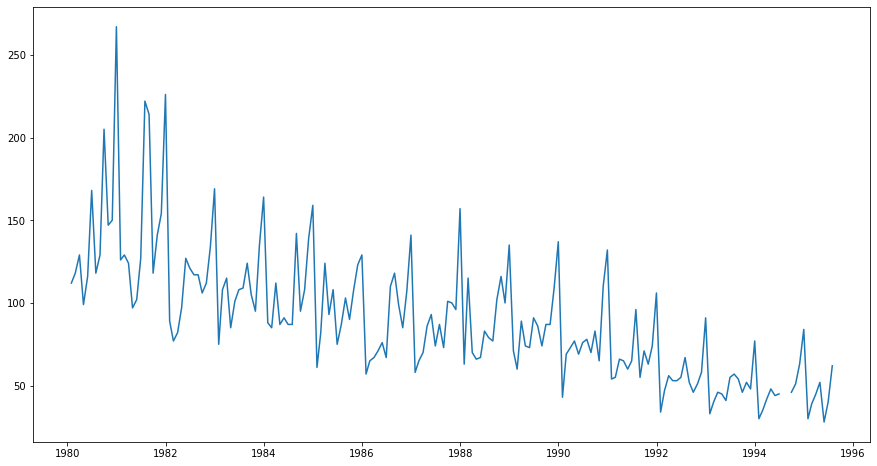

In [12]:
plt.figure(figsize=(15,8))
plt.plot(df['Rose']);

<span style="font-family:Perpetua; font-size:1.4em;"><B/><U/>Impute the NAN values with Mean

In [13]:
df=df.fillna(df.mean())

In [14]:
df.tail(15)

YearMonth       Rose
Time_Stamp                     
1994-05-31   1994-05  44.000000
1994-06-30   1994-06  45.000000
1994-07-31   1994-07  90.394595
1994-08-31   1994-08  90.394595
1994-09-30   1994-09  46.000000
1994-10-31   1994-10  51.000000
1994-11-30   1994-11  63.000000
1994-12-31   1994-12  84.000000
1995-01-31   1995-01  30.000000
1995-02-28   1995-02  39.000000
1995-03-31   1995-03  45.000000
1995-04-30   1995-04  52.000000
1995-05-31   1995-05  28.000000
1995-06-30   1995-06  40.000000
1995-07-31   1995-07  62.000000

In [15]:
df.describe()

Rose
count  187.000000
mean    90.394595
std     38.964155
min     28.000000
25%     63.000000
50%     86.000000
75%    111.000000
max    267.000000

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       187 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


<span style="font-family:Perpetua; font-size:1.4em;"><B/><U/>The graph after treatment of missing values

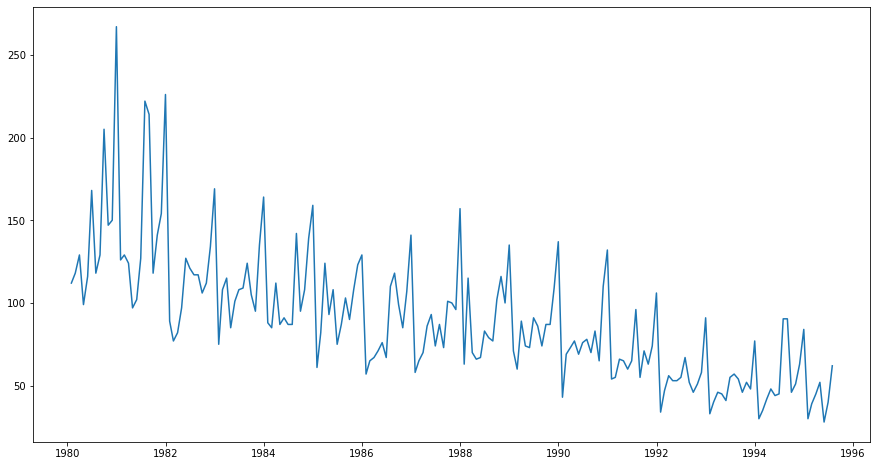

In [17]:
plt.figure(figsize=(15,8))
plt.plot(df['Rose']);

<span style="font-family:Perpetua Titling MT; font-size:1.3em;"><B/><U/>Plot a boxplot to understand the sales of Wines

<Font color='purple'/><span style="font-family:Perpetua; font-size:1.4em;"><B/><U/>Yearly Boxplot

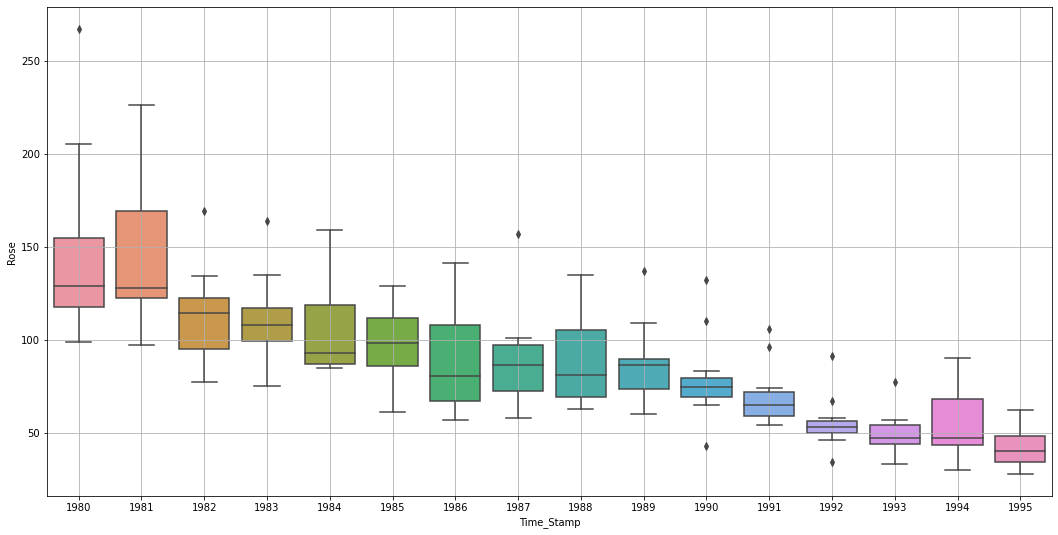

In [18]:
rcParams['figure.figsize'] = 18,9
sns.boxplot(x = df.index.year,y = df['Rose'])
plt.grid();

<font color='purple'/><span style="font-family:Perpetua; font-size:1.4em;"><B/><U/>Monthly Plot

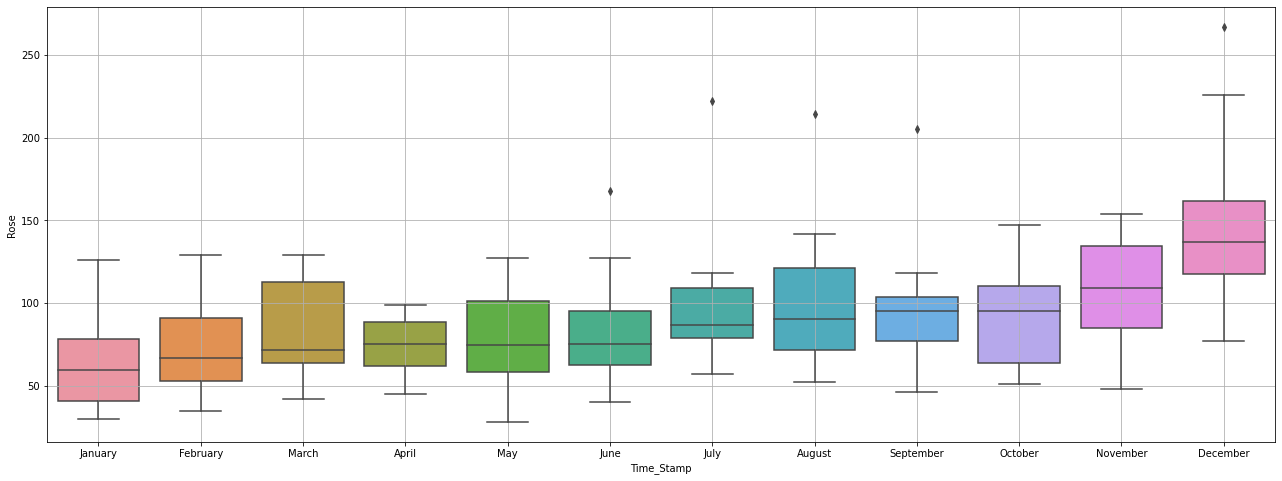

In [19]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df['Rose'])
plt.grid();

<font color='purple'/><span style="font-family:Perpetua; font-size:1.4em;"><B/><U/>Monthly sales accross year

In [20]:
from statsmodels.graphics.tsaplots import month_plot

In [21]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, 
                                        index = df.index.year)
monthly_sales_across_years

Time_Stamp     1      2      3     4      5      6           7           8   \
Time_Stamp                                                                    
1980        112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981        126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982         89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983         75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984         88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985         61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986         57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987         58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988         63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989         71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990         43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991         54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992         34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993         33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994         30.0   35.0   42.0  48.0   44.0   45.0   90.394595   90.394595   
1995         30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

Time_Stamp     9      10     11     12  
Time_Stamp                              
1980        205.0  147.0  150.0  267.0  
1981        118.0  141.0  154.0  226.0  
1982        106.0  112.0  134.0  169.0  
1983        105.0   95.0  135.0  164.0  
1984         95.0  108.0  139.0  159.0  
1985         90.0  108.0  123.0  129.0  
1986         99.0   85.0  107.0  141.0  
1987        101.0  100.0   96.0  157.0  
1988        102.0  116.0  100.0  135.0  
1989         87.0   87.0  109.0  137.0  
1990         83.0   65.0  110.0  132.0  
1991         71.0   63.0   74.0  106.0  
1992         46.0   51.0   58.0   91.0  
1993         46.0   52.0   48.0   77.0  
1994         46.0   51.0   63.0   84.0  
1995          NaN    NaN    NaN    NaN

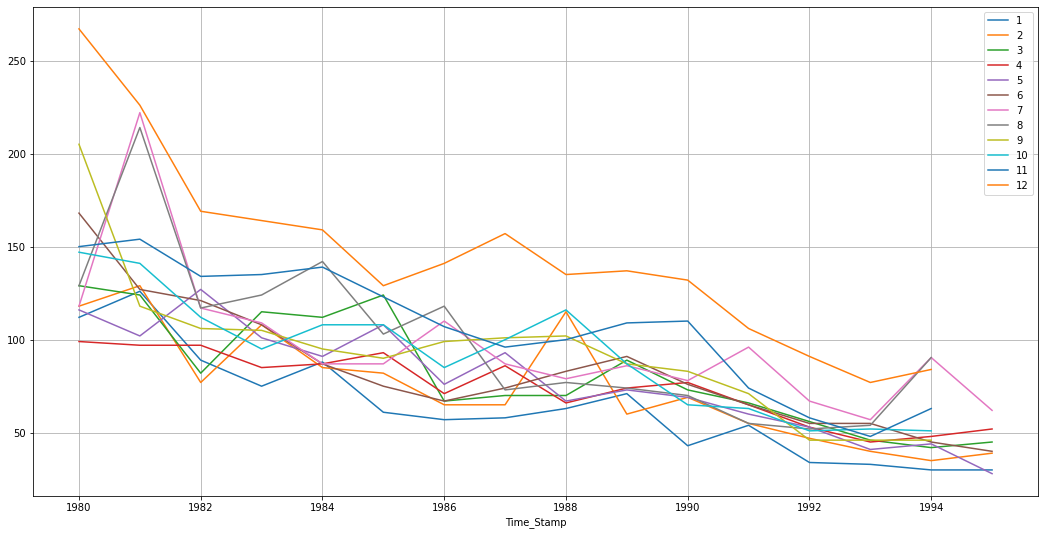

In [22]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

<font color='purple'/><span style="font-family:Perpetua; font-size:1.4em;"><B/><U/>Emperical Cumulative Distribution

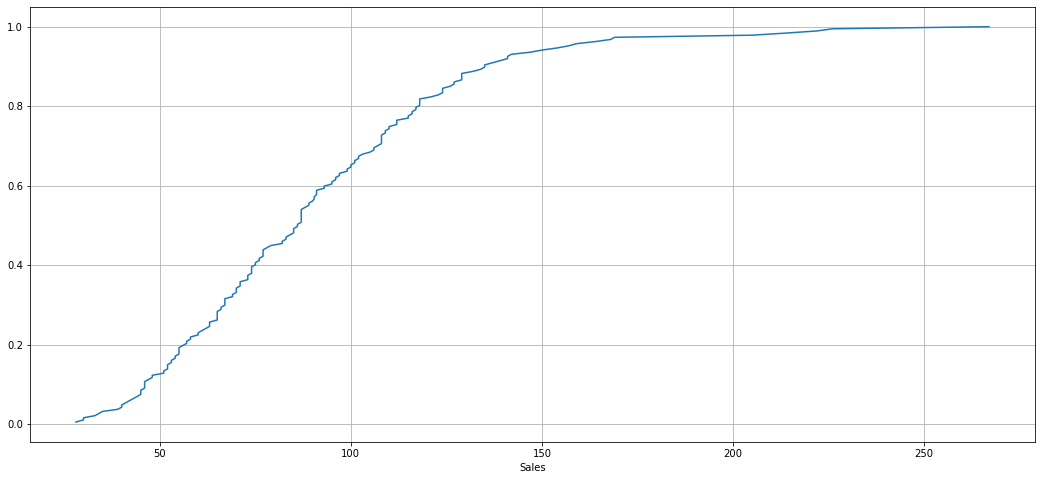

In [23]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

<font color='purple'/><span style="font-family:Perpetua; font-size:1.4em;"><B/><U/>Average Sales & Percentage of Sales

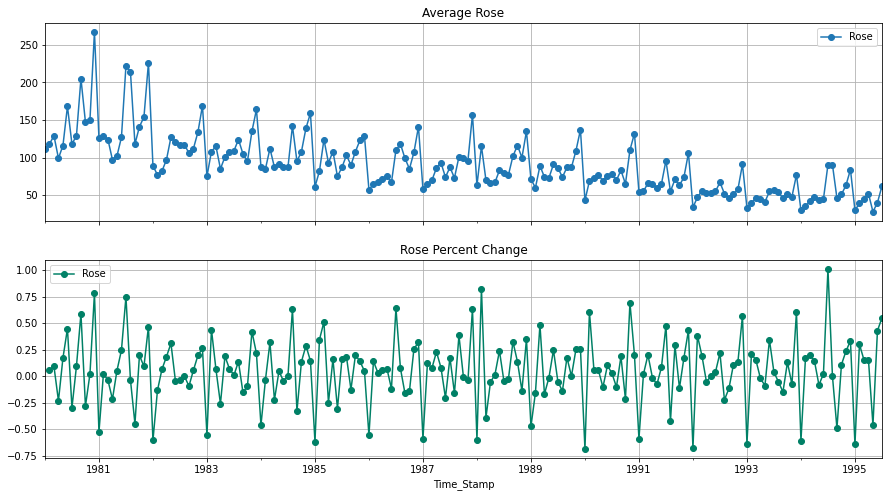

In [24]:
# group by date and get average Wine Sales, and precent change
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Percent Change",grid=True)

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
df.columns

Index(['YearMonth', 'Rose'], dtype='object')

<font color='purple'/><span style="font-family:Perpetua; font-size:1.4em;"><B/><U/>Yearly Sum of Observation

In [27]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

Rose
Time_Stamp        
1980-12-31  1758.0
1981-12-31  1780.0
1982-12-31  1348.0
1983-12-31  1324.0
1984-12-31  1280.0

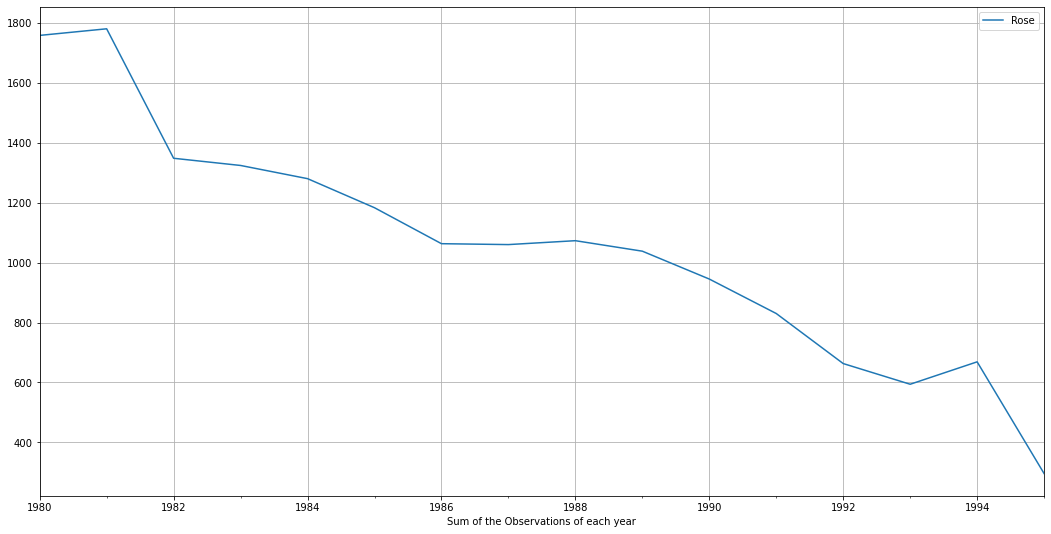

In [28]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

<font color='purple'/><span style="font-family:Perpetua; font-size:1.4em;"><B/><U/>Yearly Mean of Observation

In [29]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean.head()

Rose
Time_Stamp            
1980-12-31  146.500000
1981-12-31  148.333333
1982-12-31  112.333333
1983-12-31  110.333333
1984-12-31  106.666667

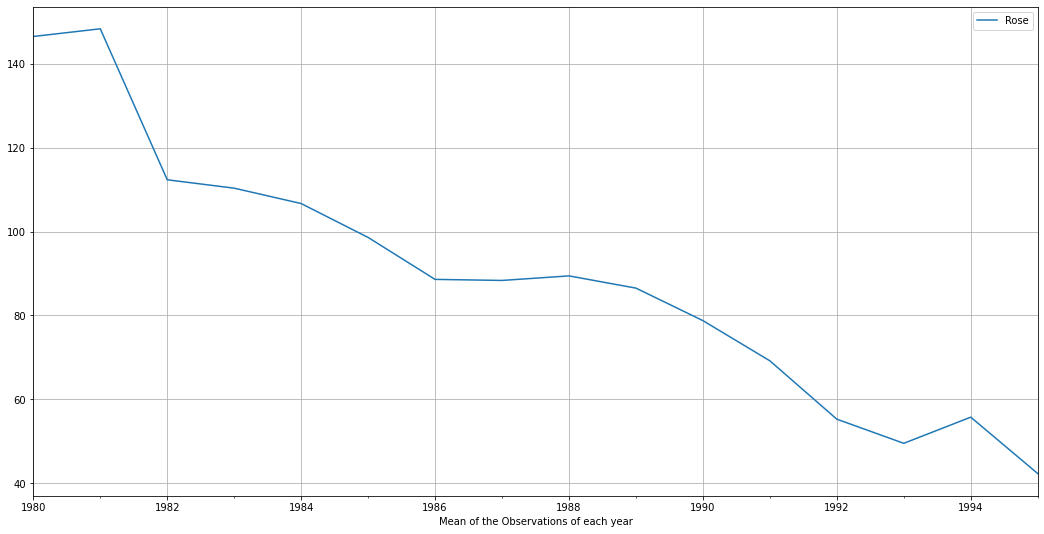

In [30]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

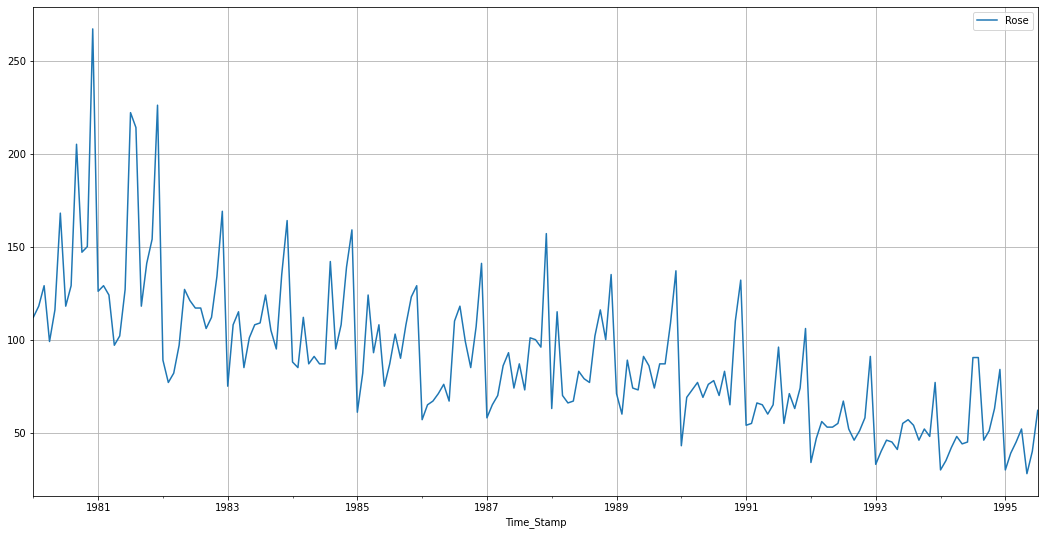

In [31]:
df.plot()
plt.grid();

<font color='purple'/><span style="font-family:Perpetua; font-size:1.4em;"><B/><U/>Quarterly Sum of Observation

In [32]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()

Rose
Time_Stamp       
1980-03-31  359.0
1980-06-30  383.0
1980-09-30  452.0
1980-12-31  564.0
1981-03-31  379.0

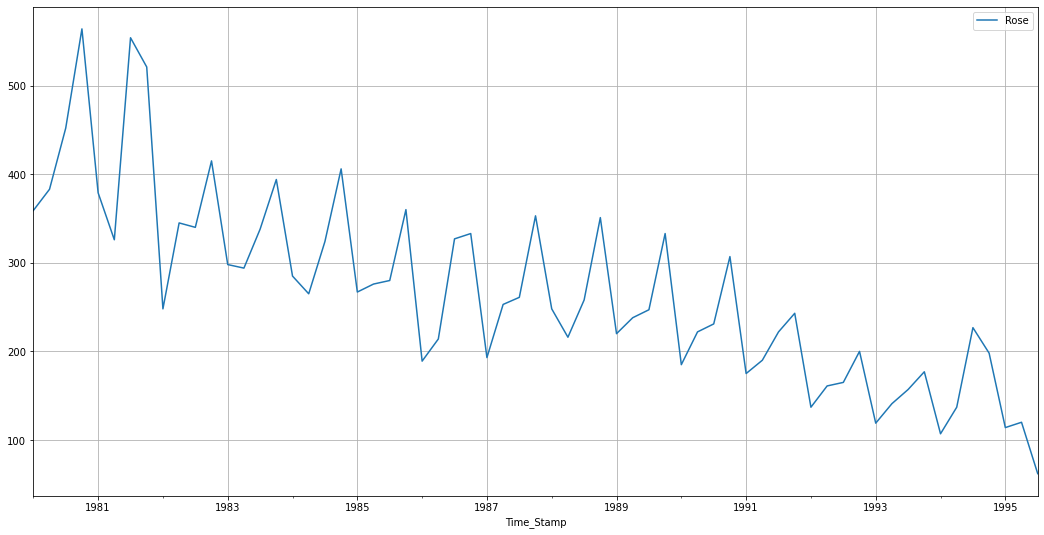

In [33]:
df_quarterly_sum.plot();
plt.grid()

<font color='purple'/><span style="font-family:Perpetua; font-size:1.4em;"><B/><U/>Quarterly Sum of Observation

In [34]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

Rose
Time_Stamp            
1980-03-31  119.666667
1980-06-30  127.666667
1980-09-30  150.666667
1980-12-31  188.000000
1981-03-31  126.333333

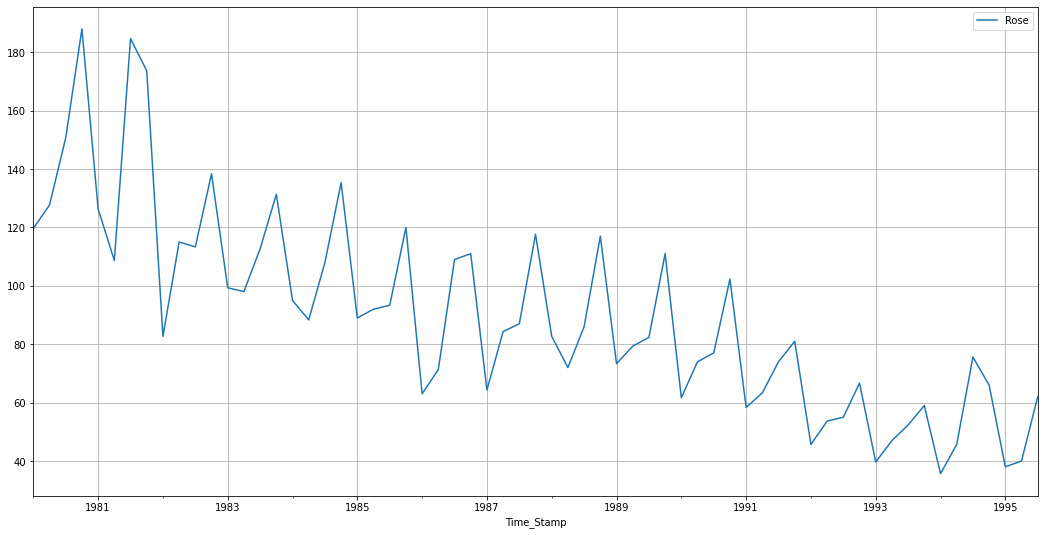

In [35]:
df_quarterly_mean.plot();
plt.grid()

<font color='purple'/><span style="font-family:Perpetua; font-size:1.4em;"><B/><U/>Daily Sum of Observation

In [36]:
df_daily_sum = df.resample('D').sum()
df_daily_sum

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-01    0.0
1980-02-02    0.0
1980-02-03    0.0
1980-02-04    0.0
...           ...
1995-07-27    0.0
1995-07-28    0.0
1995-07-29    0.0
1995-07-30    0.0
1995-07-31   62.0

[5661 rows x 1 columns]

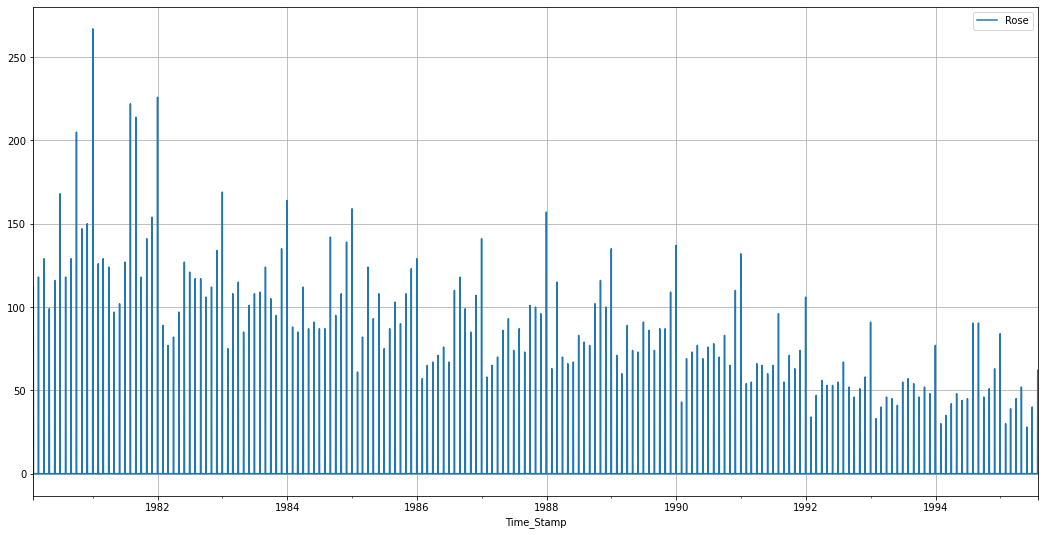

In [37]:
df_daily_sum.plot()
plt.grid();

<font color='purple'/><span style="font-family:Perpetua; font-size:1.4em;"><B/><U/>Decade Sum of Observation

In [38]:
df_decade_sum = df.resample('10Y').sum()
df_decade_sum

Rose
Time_Stamp              
1980-12-31   1758.000000
1990-12-31  12094.000000
2000-12-31   3051.789189

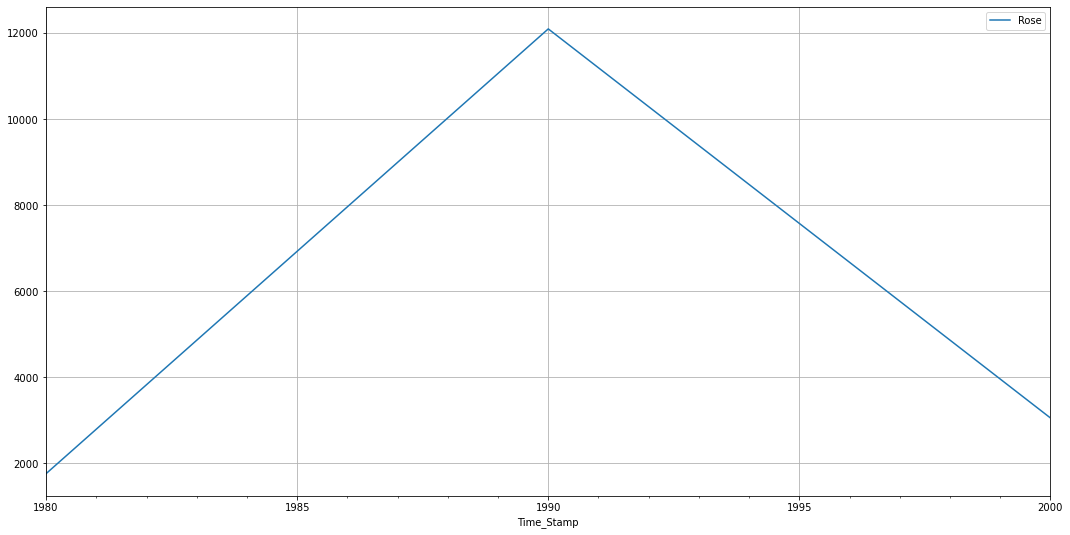

In [39]:
df_decade_sum.plot();
plt.grid()

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.4em;"><B/><U/>Decomposition

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [41]:
df["Time_Stamp"] = df.index.values

In [42]:
df = df[df.Time_Stamp.notnull()]

In [43]:
df.drop(["Time_Stamp"], axis=1, inplace=True)

<font color='purple'/><span style="font-family:Perpetua; font-size:1.4em;"><B/><U/>Additive

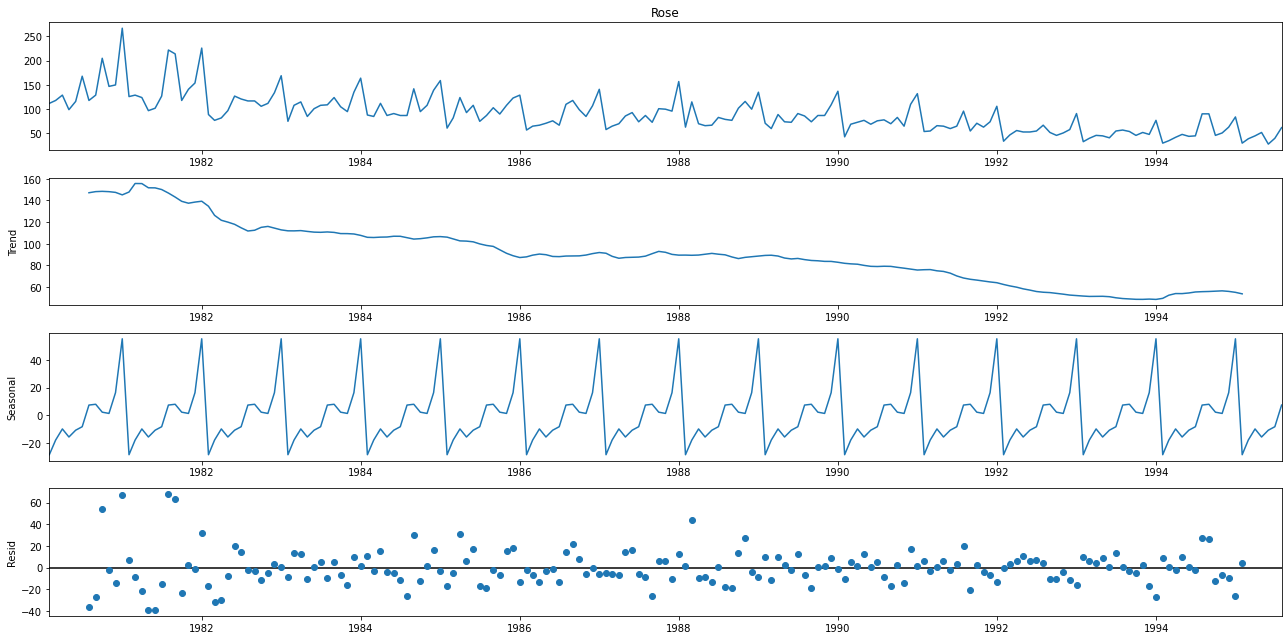

In [44]:
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

In [45]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -28.403723
1980-02-29   -17.833219
1980-03-31    -9.816537
1980-04-30   -15.629037
1980-05-31   -10.727251
1980-06-30    -8.209394
1980-07-31     7.405916
1980-08-31     7.986472
1980-09-30     2.279610
1980-10-31     1.376832
1980-11-30    16.351832
1980-12-31    55.218499
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -36.489250
1980-08-31   -27.111472
1980-09-30    54.345390
1980-10-31    -2.460165
1980-11-30   -13.768499
1980-12-31    66.65

<font color='purple'/><span style="font-family:Perpetua; font-size:1.4em;"><B/><U/>Multiplicative

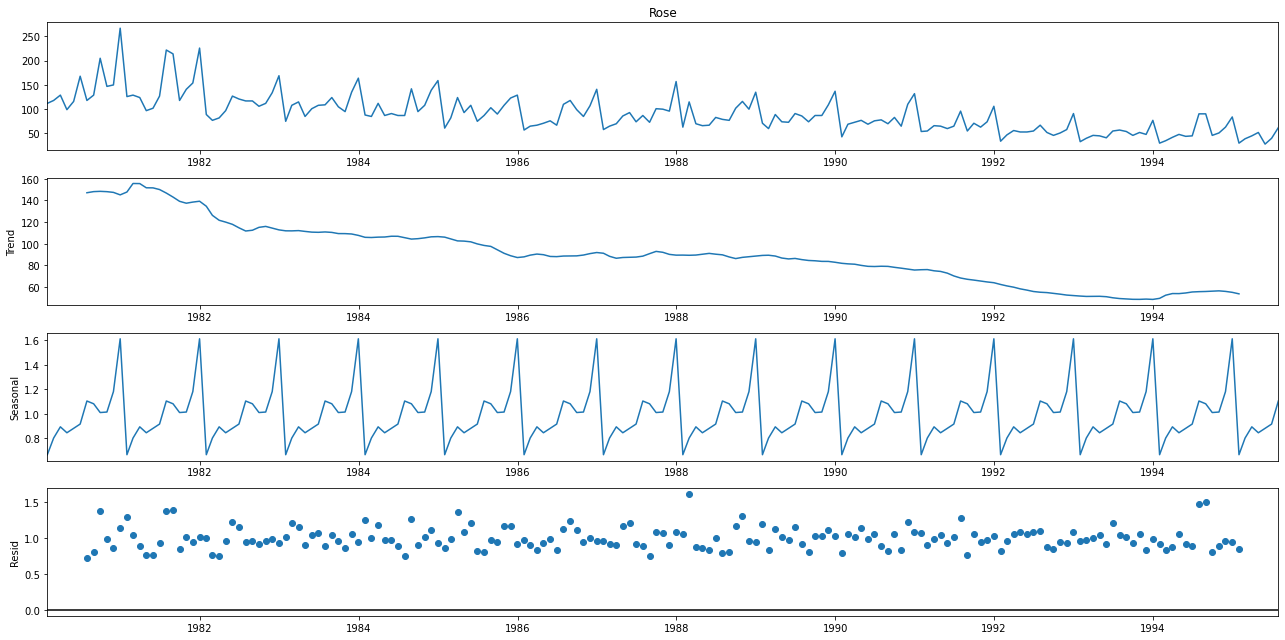

In [46]:
decomposition = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition.plot();

In [47]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.664388
1980-02-29    0.800694
1980-03-31    0.892495
1980-04-30    0.844044
1980-05-31    0.880516
1980-06-30    0.915220
1980-07-31    1.103899
1980-08-31    1.081169
1980-09-30    1.009574
1980-10-31    1.013692
1980-11-30    1.181135
1980-12-31    1.613174
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.726757
1980-08-31    0.805504
1980-09-30    1.368532
1980-10-31    0.979276
1980-11-30    0.861480
1980-12-31    1.140480
Name: resid, dtype:

<span style="font-family:Perpetua Titling MT; font-size:1.3em;"><B/><U/>stationarity

In [48]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

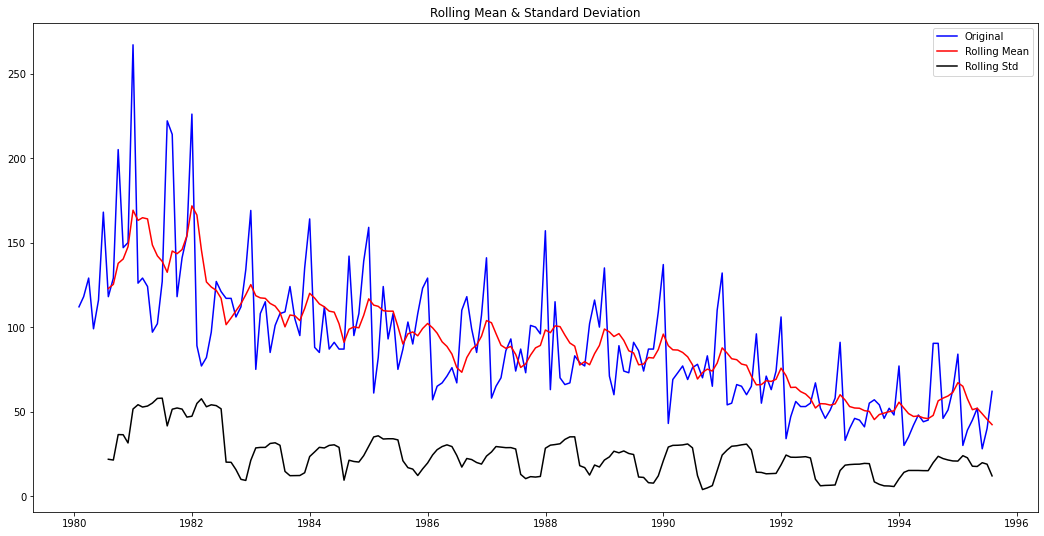

Results of Dickey-Fuller Test:
Test Statistic                  -1.933803
p-value                          0.316330
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [49]:
test_stationarity(df['Rose'])

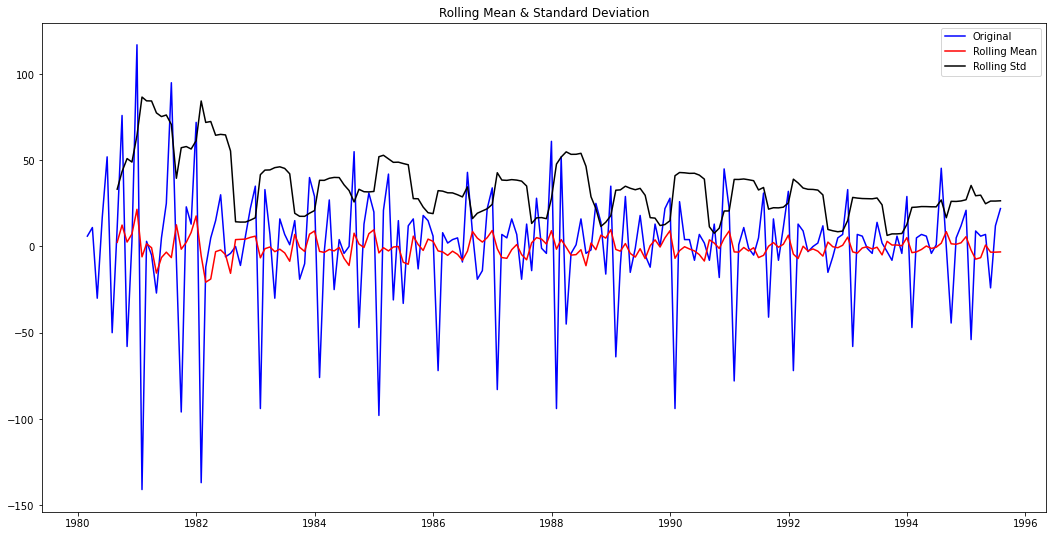

Results of Dickey-Fuller Test:
Test Statistic                -7.855944e+00
p-value                        5.442646e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [50]:
test_stationarity(df['Rose'].diff().dropna())

<span style="font-family:Perpetua Titling MT; font-size:1.3em;"><B/><U/>Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

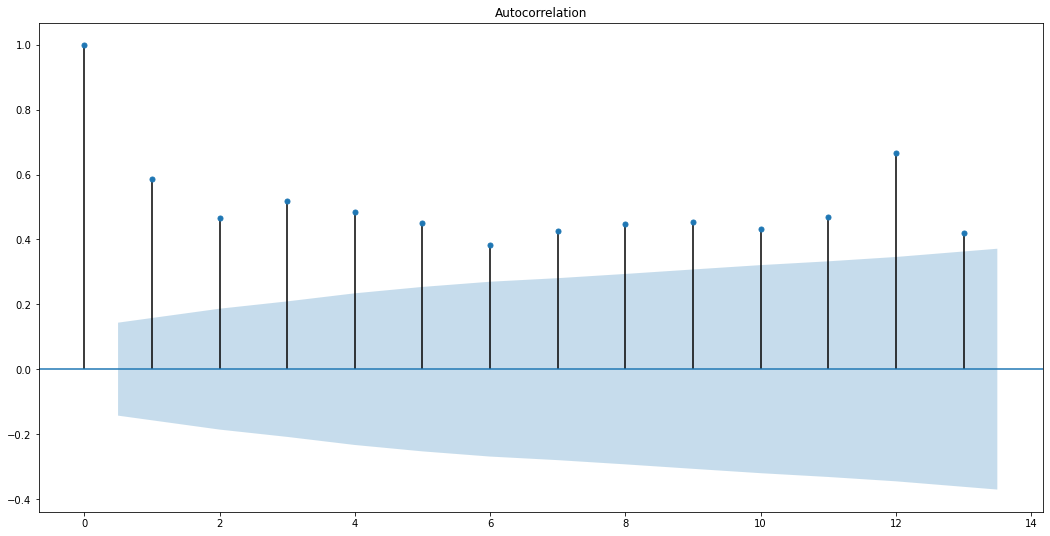

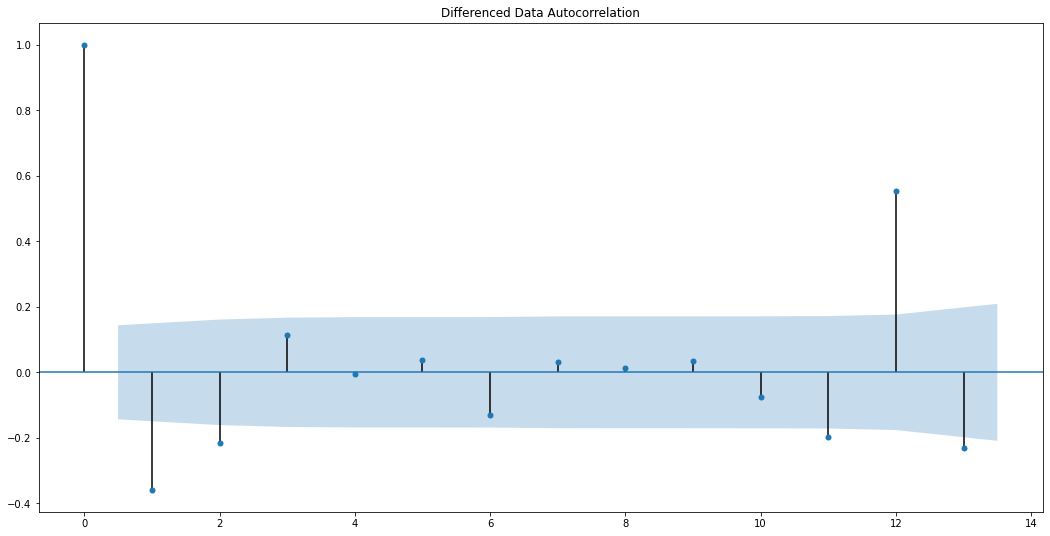

In [52]:
plot_acf(df['Rose'],lags=13)
plot_acf(df['Rose'].diff().dropna(),lags=13,title='Differenced Data Autocorrelation')
plt.show()

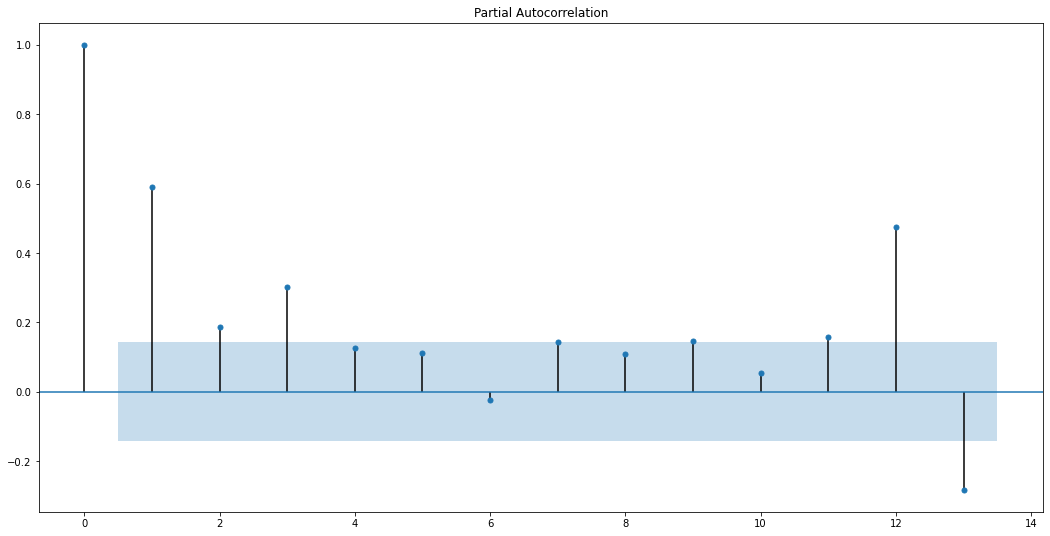

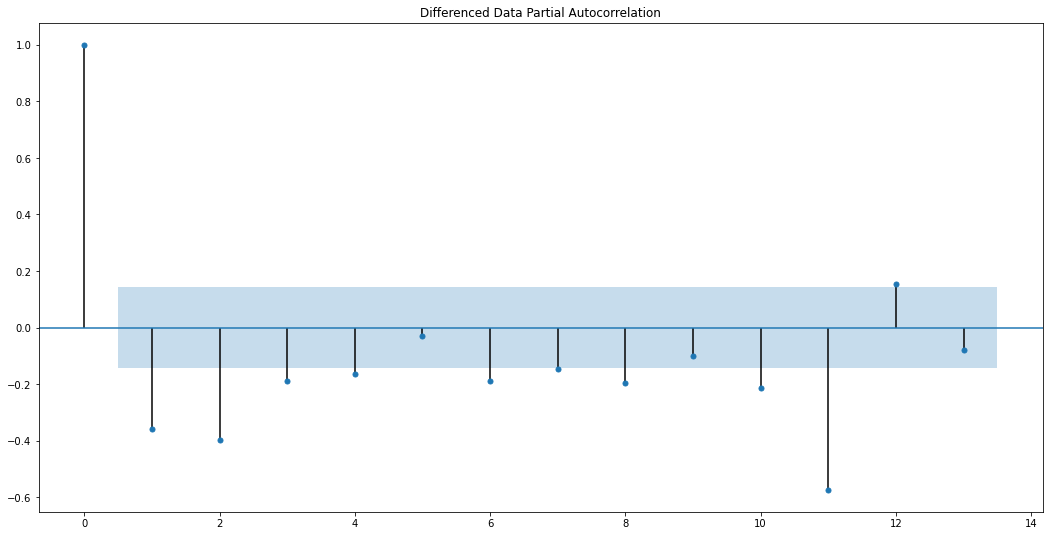

In [53]:
plot_pacf(df['Rose'],lags=13)
plot_pacf(df['Rose'].diff().dropna(),lags=13,title='Differenced Data Partial Autocorrelation')
plt.show()

<span style="font-family:Perpetua Titling MT; font-size:1.3em;"><B/><U/>Split the data into train and test and plot the training and test data.

In [54]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [55]:
from IPython.display import display

In [56]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0

Last few rows of Training Data


YearMonth   Rose
Time_Stamp                 
1990-08-31   1990-08   70.0
1990-09-30   1990-09   83.0
1990-10-31   1990-10   65.0
1990-11-30   1990-11  110.0
1990-12-31   1990-12  132.0

First few rows of Test Data


YearMonth  Rose
Time_Stamp                
1991-01-31   1991-01  54.0
1991-02-28   1991-02  55.0
1991-03-31   1991-03  66.0
1991-04-30   1991-04  65.0
1991-05-31   1991-05  60.0

Last few rows of Test Data


YearMonth  Rose
Time_Stamp                
1995-03-31   1995-03  45.0
1995-04-30   1995-04  52.0
1995-05-31   1995-05  28.0
1995-06-30   1995-06  40.0
1995-07-31   1995-07  62.0

In [57]:
print(train.shape)
print(test.shape)

(132, 2)
(55, 2)


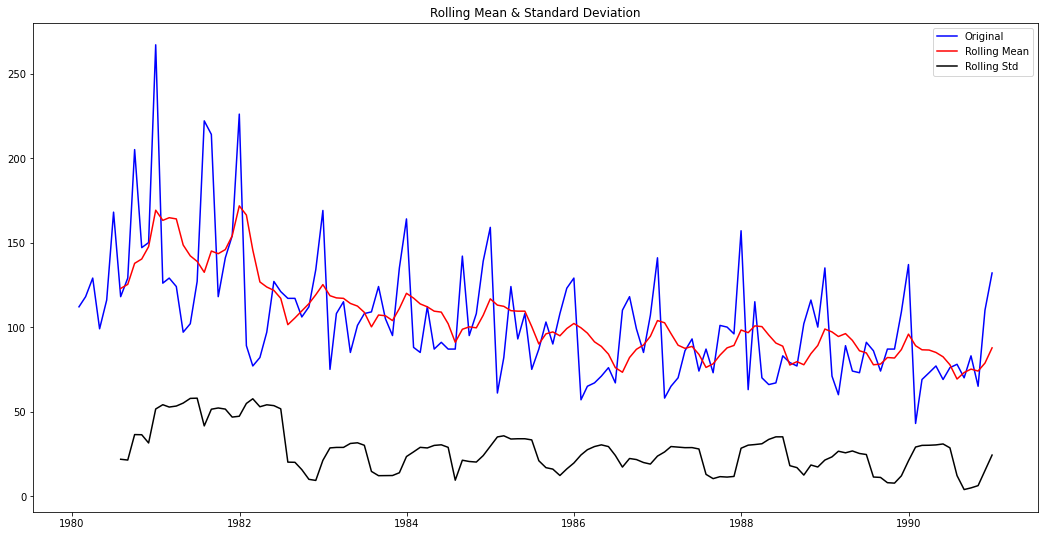

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [58]:
test_stationarity(train['Rose'])

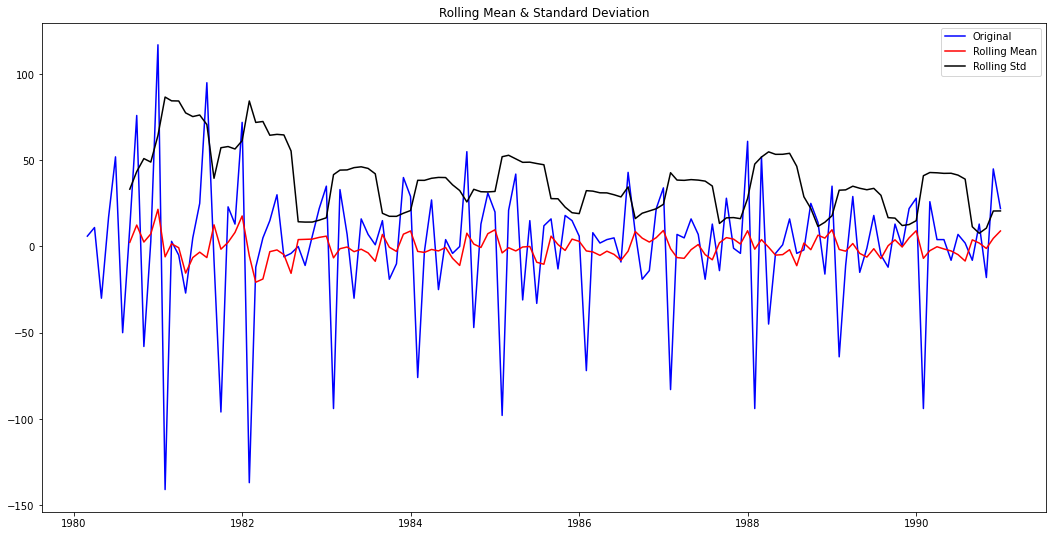

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [59]:
test_stationarity(train['Rose'].diff().dropna())

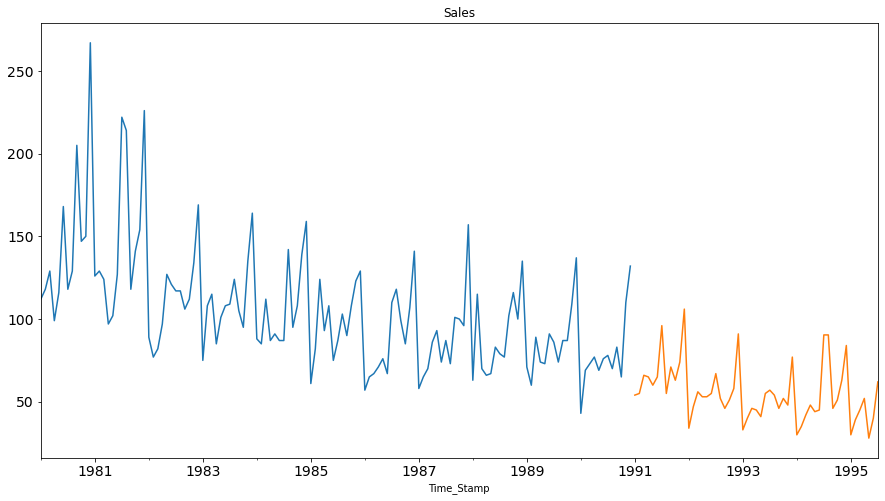

In [60]:
train['Rose'].plot(figsize=(15,8), title= 'Sales', fontsize=14)
test['Rose'].plot(figsize=(15,8), title= 'Sales', fontsize=14)

<span style="font-family:Perpetua Titling MT; font-size:1.3em;"><B/><U/>Method 1: Regression on Time

In [61]:
df1         =   df.copy() # Make a copy

time        = [i+1 for i in range(len(df))]
df1['time'] = time
monthDf     = df1[['YearMonth']]

df1.drop('YearMonth', axis=1, inplace=True)
df1.head(2)

Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2

In [62]:
train=df1[df.index.year < 1991]
test=df1[df.index.year >= 1991]

In [63]:
x_train = train.drop('Rose', axis=1)
x_test  = test.drop('Rose', axis=1)
y_train = train[['Rose']]
y_test  = test[['Rose']]

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression()

In [66]:
model.fit(x_train,y_train)

LinearRegression()

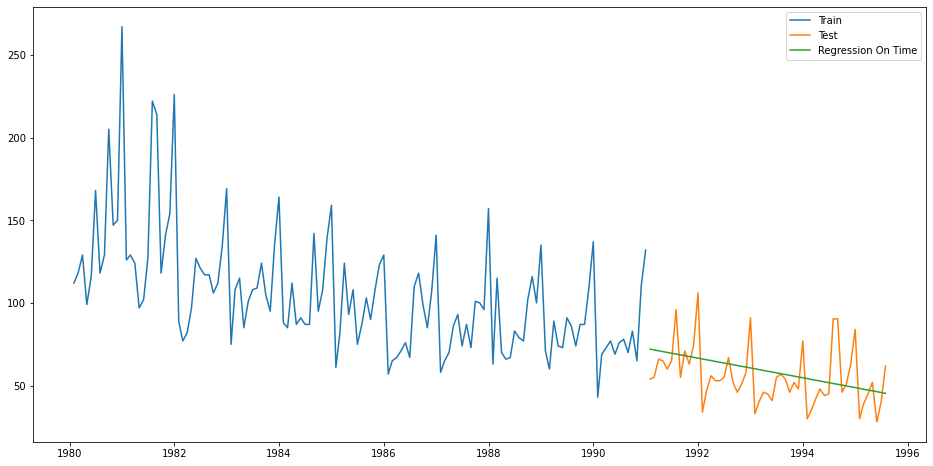

In [67]:
predictions         = model.predict(x_test)
y_test['RegOnTime'] = predictions

plt.figure(figsize=(16,8))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')

In [68]:
from math import sqrt
from   sklearn.metrics   import mean_squared_error
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [69]:
rmse = sqrt(mean_squared_error(test.Rose, y_test.RegOnTime))
rmse = round(rmse, 3)
mape = MAPE(test.Rose, y_test.RegOnTime)
print("For RegressionOnTime,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For RegressionOnTime,  RMSE is 16.979 MAPE is 24.36


In [70]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE': [mape]},index=['RegressionOnTime'])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime     16.979      24.36

<span style="font-family:Perpetua Titling MT; font-size:1.3em;"><B/><U/>Model 2: Naive Approach: 𝑦̂ 𝑡+1=𝑦𝑡

In [71]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [72]:
NaiveModel_train['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]

In [73]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]

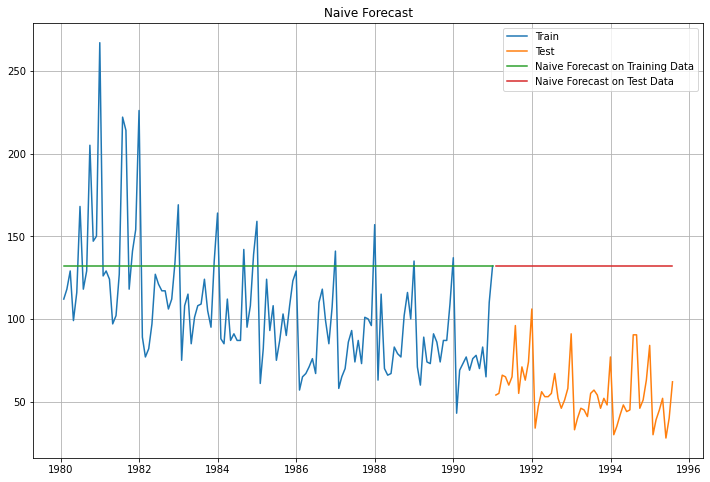

In [74]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

<span style="font-family:Perpetua Titling MT; font-size:1.3em;"><B/><U/>Model Evaluation

In [75]:
from sklearn import metrics

In [76]:
## Training Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Rose'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 45.064 MAPE is 36.38


In [77]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Rose'],NaiveModel_test['naive'])
print("For Naive on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For Naive on the Test Data,  RMSE is 78.396 MAPE is 137.89


In [78]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf_2 = pd.concat([resultsDf, resultsDf_2])
resultsDf_2

Test RMSE  Test MAPE
RegressionOnTime  16.979000      24.36
NaiveModel        78.396083     137.89

<span style="font-family:Perpetua Titling MT; font-size:1.3em;"><B/><U/>Method 3: Simple Average

In [79]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [80]:
SimpleAverage_train['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()

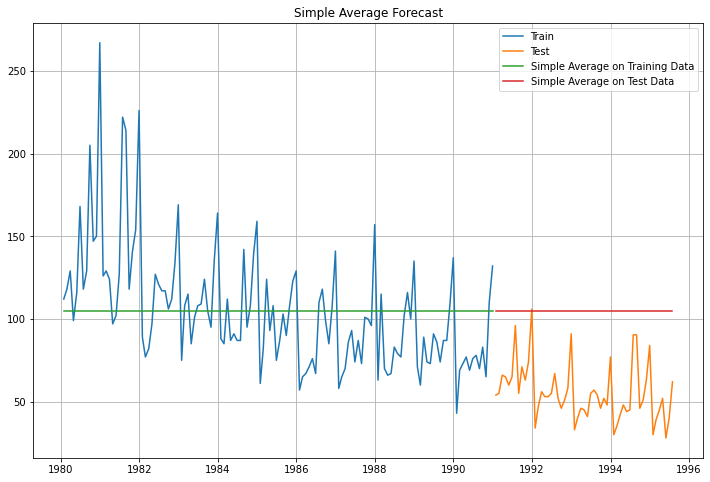

In [81]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [82]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Rose'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 36.034 MAPE is 25.39


In [83]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Rose'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 52.319 MAPE is 89.19


In [84]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf,resultsDf_2, resultsDf_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime    16.979000      24.36
RegressionOnTime    16.979000      24.36
NaiveModel          78.396083     137.89
SimpleAverageModel  52.318735      89.19

<span style="font-family:Perpetua Titling MT; font-size:1.3em;"><B/><U/>Method 4: Moving Average(MA)

In [85]:
MovingAverage = df.copy()

In [86]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage.head()

YearMonth   Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                                 
1980-01-31   1980-01  112.0         NaN         NaN         NaN         NaN
1980-02-29   1980-02  118.0       115.0         NaN         NaN         NaN
1980-03-31   1980-03  129.0       123.5         NaN         NaN         NaN
1980-04-30   1980-04   99.0       114.0       114.5         NaN         NaN
1980-05-31   1980-05  116.0       107.5       115.5         NaN         NaN

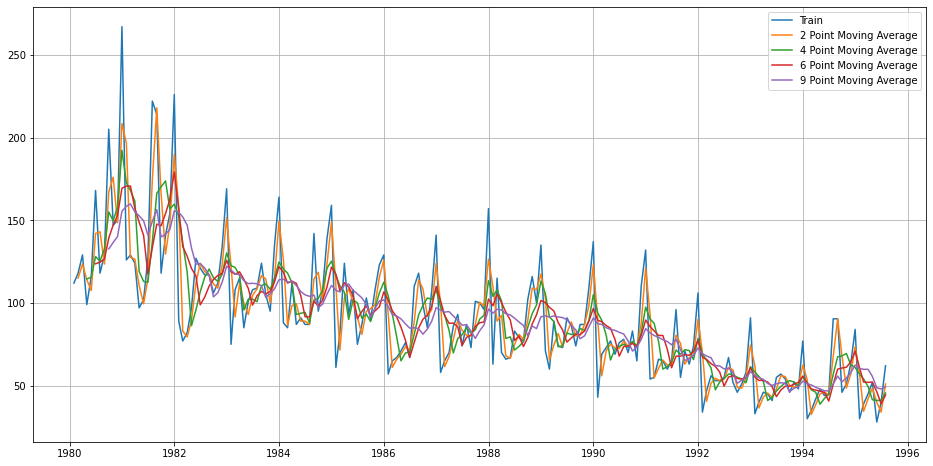

In [87]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [88]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

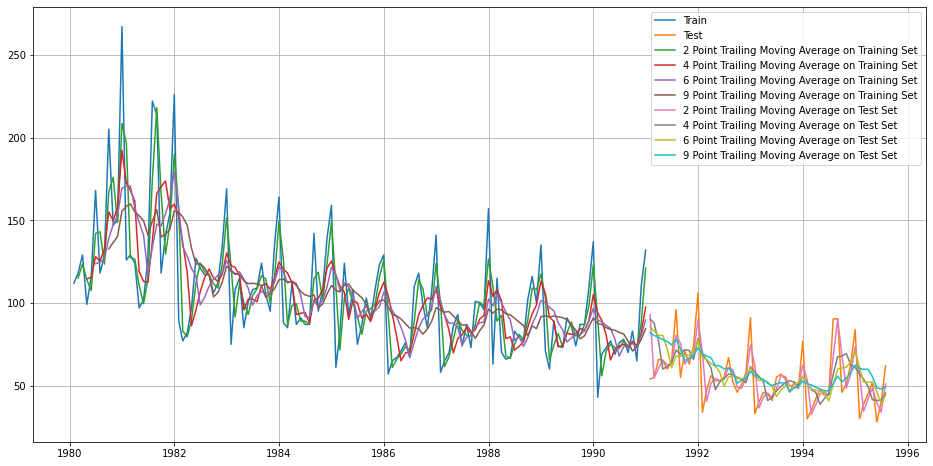

In [89]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

<span style="font-family:Perpetua Titling MT; font-size:1.3em;"><B/><U/>Model Evaluation

In [90]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 12.298 MAPE is 14.59
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 15.846 MAPE is 21.55
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 15.986 MAPE is 22.40
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 16.501 MAPE is 23.18


In [91]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime             16.979000      24.36
RegressionOnTime             16.979000      24.36
NaiveModel                   78.396083     137.89
SimpleAverageModel           52.318735      89.19
2pointTrailingMovingAverage  12.298291      14.59
4pointTrailingMovingAverage  15.845558      21.55
6pointTrailingMovingAverage  15.986163      22.40
9pointTrailingMovingAverage  16.500823      23.18

<span style="font-family:Perpetua Titling MT; font-size:1.3em;"><B/><U/>Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

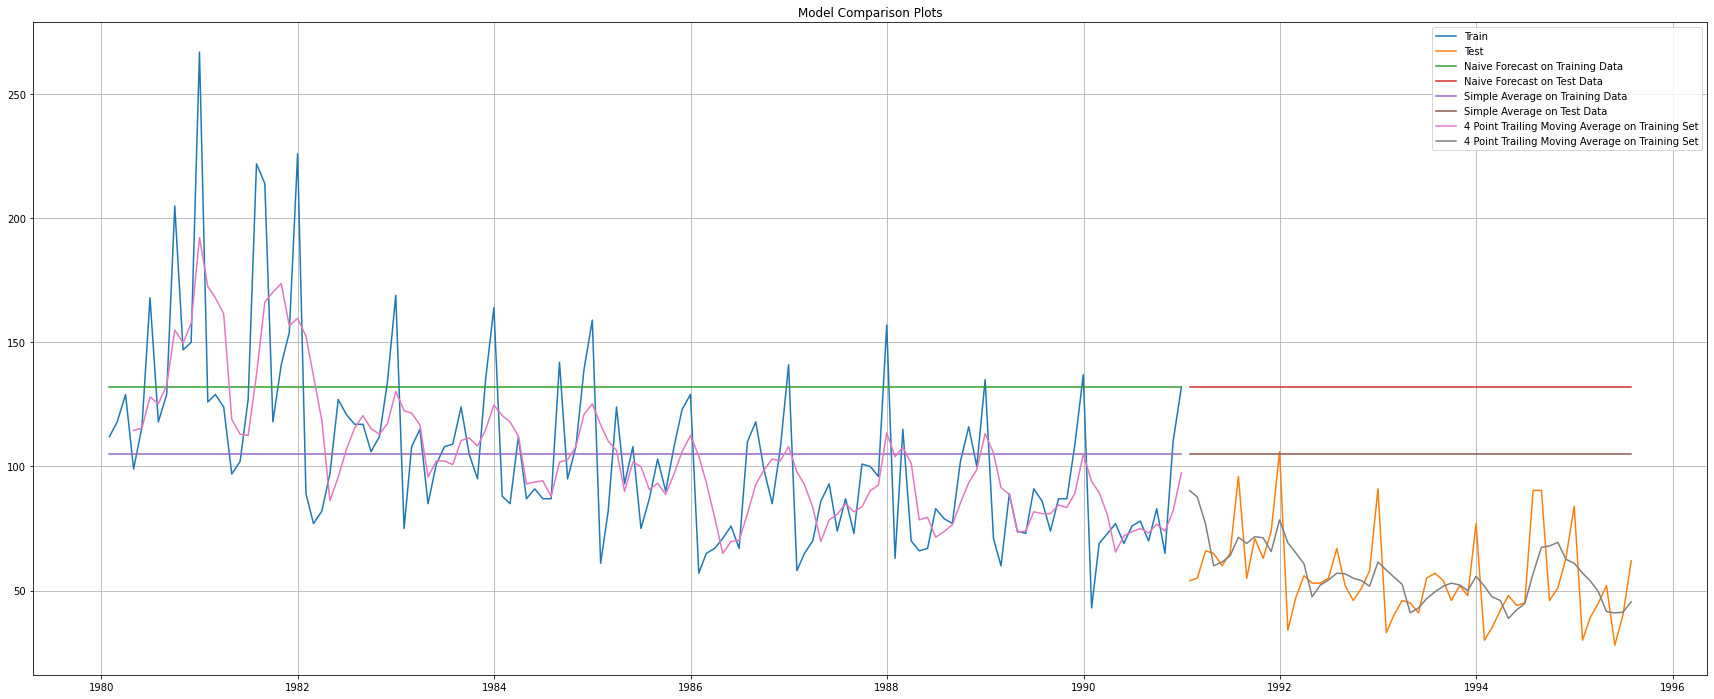

In [92]:
plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

<span style="font-family:Perpetua Titling MT; font-size:1.3em;"><B/><U/>Method 5: Simple Exponential Smoothing

In [93]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [94]:
SES_train = df1[df.index.year < 1991]
SES_test = df1[df.index.year >= 1991]

In [95]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [96]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [97]:
model_SES_autofit.params

{'smoothing_level': 0.09874995548802579,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38685411272016,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [98]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

Rose  time     predict
Time_Stamp                         
1980-01-31  112.0     1  134.386854
1980-02-29  118.0     2  132.176153
1980-03-31  129.0     3  130.776259
1980-04-30   99.0     4  130.600853
1980-05-31  116.0     5  127.480270

In [99]:
len(SES_test)

55

In [100]:
SES_test['predict'] = model_SES_autofit.forecast(steps=55)
SES_test.head()

Rose  time    predict
Time_Stamp                       
1991-01-31  54.0   133  87.105001
1991-02-28  55.0   134  87.105001
1991-03-31  66.0   135  87.105001
1991-04-30  65.0   136  87.105001
1991-05-31  60.0   137  87.105001

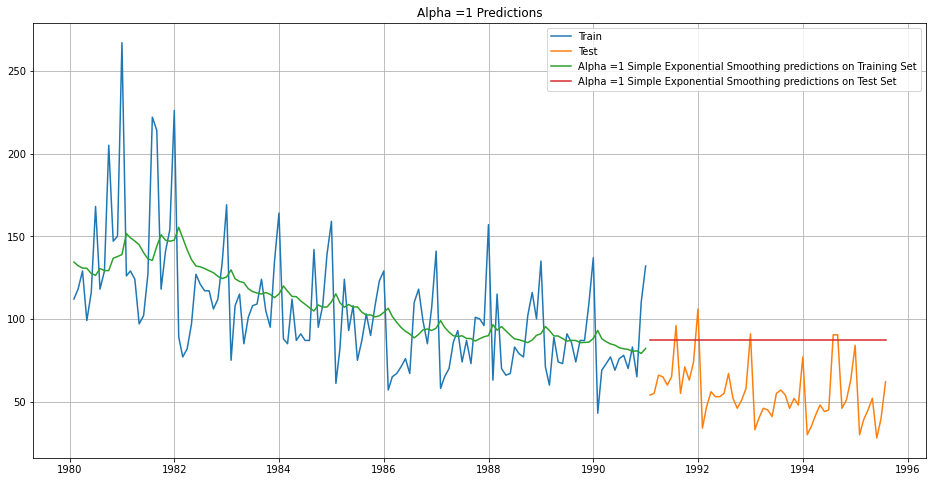

In [101]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =1 Predictions');

<span style="font-family:Perpetua Titling MT; font-size:1.3em;"><B/><U/>Model Evaluation for 𝛼 = 1 : Simple Exponential Smoothing

In [102]:
## Training Data

rmse_model5_train_1 = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict'],squared=False)
mape_model5_train_1 = MAPE(SES_train['Rose'],SES_train['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 31.501 MAPE is 22.73


In [103]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Rose'],SES_test['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Testing Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))


For Alpha =1 Simple Exponential Smoothing Model forecast on the Testing Data,  RMSE is 35.936 MAPE is 59.49


In [104]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Alpha=1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                    16.979000      24.36
RegressionOnTime                    16.979000      24.36
NaiveModel                          78.396083     137.89
SimpleAverageModel                  52.318735      89.19
2pointTrailingMovingAverage         12.298291      14.59
4pointTrailingMovingAverage         15.845558      21.55
6pointTrailingMovingAverage         15.986163      22.40
9pointTrailingMovingAverage         16.500823      23.18
Alpha=1,SimpleExponentialSmoothing  35.936214      59.49

Setting different alpha values

In [105]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [106]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Rose'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Rose'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

In [107]:
resultsDf_6

Alpha Values  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0           0.3   32.448833       22.31  46.437040      78.30
1           0.4   33.028400       22.51  52.622270      89.75
2           0.5   33.680192       22.69  58.440933     100.73
3           0.6   34.439946       22.89  63.729750     110.65
4           0.7   35.322683       23.09  68.426395     119.42
5           0.8   36.334371       23.42  72.479641     126.95
6           0.9   37.482735       23.93  75.828283     133.15

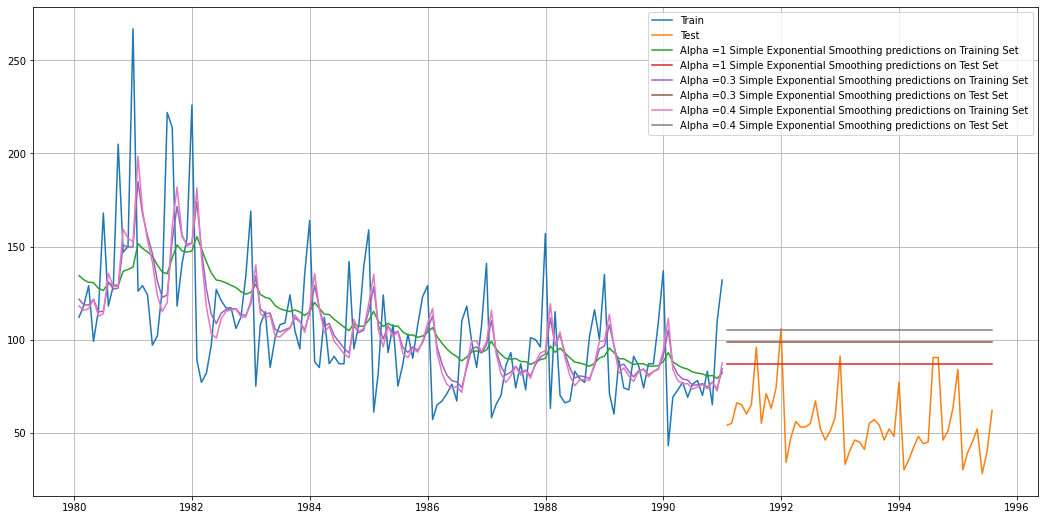

In [108]:
plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

<span style="font-family:Perpetua Titling MT; font-size:1.3em;"><B/><U/>Method 6: Double Exponential Smoothing (Holt's Model)

In [109]:
DES_train = df1[df.index.year < 1991]
DES_test = df1[df.index.year >= 1991]

In [110]:
model_DES = Holt(DES_train['Rose'])

In [224]:
model_fit = Holt(np.asarray(DES_train['Rose'])).fit()

In [225]:
DES_test['Holt_linear'] = model_fit.forecast(len(DES_test))

In [226]:
print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)

print('Smoothing Level', alpha_value )
print('Smoothing Slope', beta_value)
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


==Holt model Exponential Smoothing Parameters ==

Smoothing Level 0.1579
Smoothing Slope 0.1579
Initial Level 112.0



In [227]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})

In [228]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Rose'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Rose'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

In [229]:
resultsDf_7

Alpha Values  Beta Values  Train RMSE  Train MAPE   Test RMSE  Test MAPE
0            0.3          0.3   35.928003       25.51  263.521730     426.54
1            0.3          0.4   37.393239       26.53  356.662926     573.50
2            0.3          0.5   38.888325       27.54  449.698372     720.36
3            0.3          0.6   40.280670       28.63  534.828317     854.96
4            0.3          0.7   41.403518       29.56  599.483053     957.52
..           ...          ...         ...         ...         ...        ...
59           1.0          0.6   51.828562       34.61  799.538675    1281.96
60           1.0          0.7   54.493671       36.36  839.747831    1345.07
61           1.0          0.8   57.362069       38.19  851.819895    1364.01
62           1.0          0.9   60.470112       40.12  832.566741    1333.80
63           1.0          1.0   63.869184       42.41  777.939896    1248.06

[64 rows x 6 columns]

In [230]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Train MAPE   Test RMSE  Test MAPE
0            0.3          0.3   35.928003       25.51  263.521730     426.54
8            0.4          0.3   36.733732       25.57  337.233125     545.84
1            0.3          0.4   37.393239       26.53  356.662926     573.50
16           0.5          0.3   37.424080       25.45  392.185872     634.89
24           0.6          0.3   38.343309       25.58  437.200847     707.80

In [231]:
resultsDf_7.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values  Train RMSE  Train MAPE   Test RMSE  Test MAPE
0            0.3          0.3   35.928003       25.51  263.521730     426.54
8            0.4          0.3   36.733732       25.57  337.233125     545.84
1            0.3          0.4   37.393239       26.53  356.662926     573.50
16           0.5          0.3   37.424080       25.45  392.185872     634.89
9            0.4          0.4   37.982228       26.45  439.861288     707.77

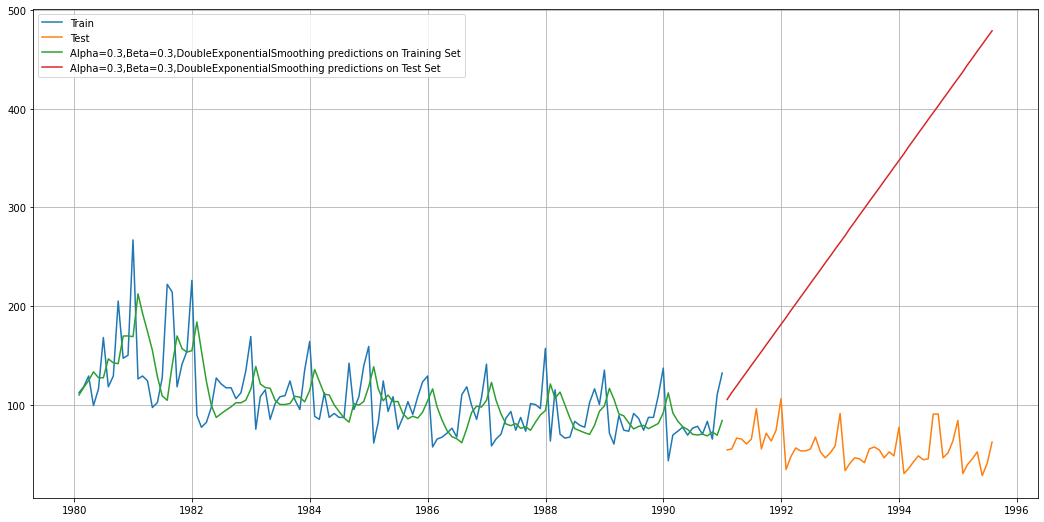

In [123]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [124]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7['Test RMSE'][0]],'Test MAPE':[resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                16.979000      24.36
RegressionOnTime                                16.979000      24.36
NaiveModel                                      78.396083     137.89
SimpleAverageModel                              52.318735      89.19
2pointTrailingMovingAverage                     12.298291      14.59
4pointTrailingMovingAverage                     15.845558      21.55
6pointTrailingMovingAverage                     15.986163      22.40
9pointTrailingMovingAverage                     16.500823      23.18
Alpha=1,SimpleExponentialSmoothing              35.936214      59.49
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  263.521730     426.54

<span style="font-family:Perpetua Titling MT; font-size:1.3em;"><B/><U/>Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters 𝛼, 𝛽 and 𝛾 are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [232]:
TES_train = df1[df.index.year < 1991]
TES_test = df1[df.index.year >= 1991]

In [233]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [234]:
model_TES_autofit = model_TES.fit()

In [235]:
model_TES_autofit.params

{'smoothing_level': 0.10609635267729095,
 'smoothing_slope': 0.048438465970941876,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65565227390906,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550249, 1.65927115, 1.80572616, 1.58888804, 1.77822687,
        1.92604336, 2.11649424, 2.25135166, 2.11690561, 2.08112805,
        2.40927242, 3.30448092]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [236]:
TES_train['auto_predict'] = model_TES_autofit.fittedvalues

In [237]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=55)

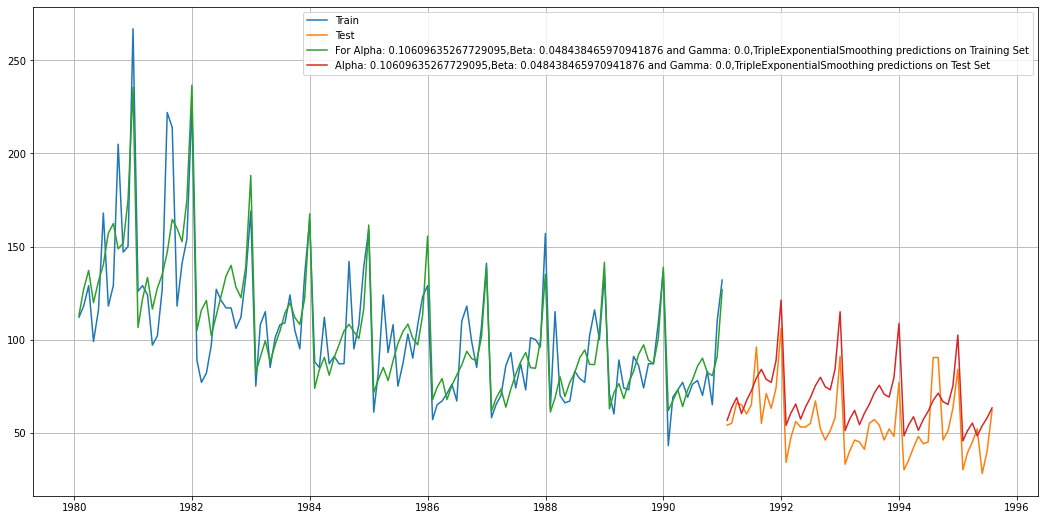

In [133]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['auto_predict'], label='For Alpha: 0.10609635267729095,Beta: 0.048438465970941876 and Gamma: 0.0,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha: 0.10609635267729095,Beta: 0.048438465970941876 and Gamma: 0.0,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [134]:
## Training Data

rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Rose'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['Rose'],TES_train['auto_predict'])
print("For Alpha: 0.10609635267729095,Beta: 0.048438465970941876 and Gamma: 0.0, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1, mape_model6_train_1))

For Alpha: 0.10609635267729095,Beta: 0.048438465970941876 and Gamma: 0.0, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 18.579 MAPE is 13.21


In [135]:
## Training Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['Rose'],TES_test['auto_predict'])
print("For Alpha: 0.10609635267729095,Beta: 0.048438465970941876 and Gamma: 0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test_1, mape_model6_test_1))

For Alpha: 0.10609635267729095,Beta: 0.048438465970941876 and Gamma: 0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 17.248 MAPE is 27.86


In [136]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_opt],'Test MAPE':[mape_opt]}
                           ,index=['Alpha=0.106,Beta=0.484,Gamma=0.0,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     16.979000      24.36
RegressionOnTime                                     16.979000      24.36
NaiveModel                                           78.396083     137.89
SimpleAverageModel                                   52.318735      89.19
2pointTrailingMovingAverage                          12.298291      14.59
4pointTrailingMovingAverage                          15.845558      21.55
6pointTrailingMovingAverage                          15.986163      22.40
9pointTrailingMovingAverage                          16.500823      23.18
Alpha=1,SimpleExponentialSmoothing                   35.936214      59.49
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       263.521730     426.54
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       263.521730     426.54
Alpha=0.106,Beta=0.484,Gamma=0.0,TripleExponent...   68.971917     113.77

In [137]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [238]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Rose'],TES_train['predict',i,j,k])
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Rose'],TES_test['predict',i,j,k])
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test,'Test MAPE':mape_model8_test}, ignore_index=True)

In [239]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE  Train MAPE  \
0              0.3          0.3           0.3     23.015713       16.25   
1              0.3          0.3           0.4     24.209084       16.78   
2              0.3          0.3           0.5     25.730329       17.50   
3              0.3          0.3           0.6     27.549930       18.44   
4              0.3          0.3           0.7     30.568635       19.41   
...            ...          ...           ...           ...         ...   
1532           1.0          1.0           0.6  28358.458519     3085.88   
1533           1.0          1.0           0.7  30724.126331     4617.55   
1534           1.0          1.0           0.8   1218.755446      493.75   
1535           1.0          1.0           0.9  14150.253251     2303.41   
1536           1.0          1.0           1.0   1768.254189      614.79   

         Test RMSE  Test MAPE  
0              NaN        NaN  
1              NaN        NaN  
2              NaN        NaN  
3              NaN        NaN  
4              NaN        NaN  
...            ...        ...  
1532   9603.401651    7582.95  
1533  23029.952139   11487.70  
1534   9627.151670    8331.48  
1535   9691.957041    7686.23  
1536   8138.889888    6613.61  

[1537 rows x 7 columns]

In [240]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
1033           0.3          0.4           0.3   28.111886       17.08   
1026           0.3          0.3           0.4   24.209084       16.78   
1094           0.4          0.3           0.8   32.601491       19.30   
1041           0.3          0.5           0.3   29.087520       17.50   
1156           0.5          0.3           0.6   32.144773       18.75   

      Test RMSE  Test MAPE  
1033  13.488427      17.13  
1026  13.858004      16.21  
1094  15.368526      18.10  
1041  18.152710      23.57  
1156  20.072673      26.79

In [241]:
resultsDf_8_2.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
1026           0.3          0.3           0.4   24.209084       16.78   
1033           0.3          0.4           0.3   28.111886       17.08   
1094           0.4          0.3           0.8   32.601491       19.30   
1041           0.3          0.5           0.3   29.087520       17.50   
1156           0.5          0.3           0.6   32.144773       18.75   

      Test RMSE  Test MAPE  
1026  13.858004      16.21  
1033  13.488427      17.13  
1094  15.368526      18.10  
1041  18.152710      23.57  
1156  20.072673      26.79

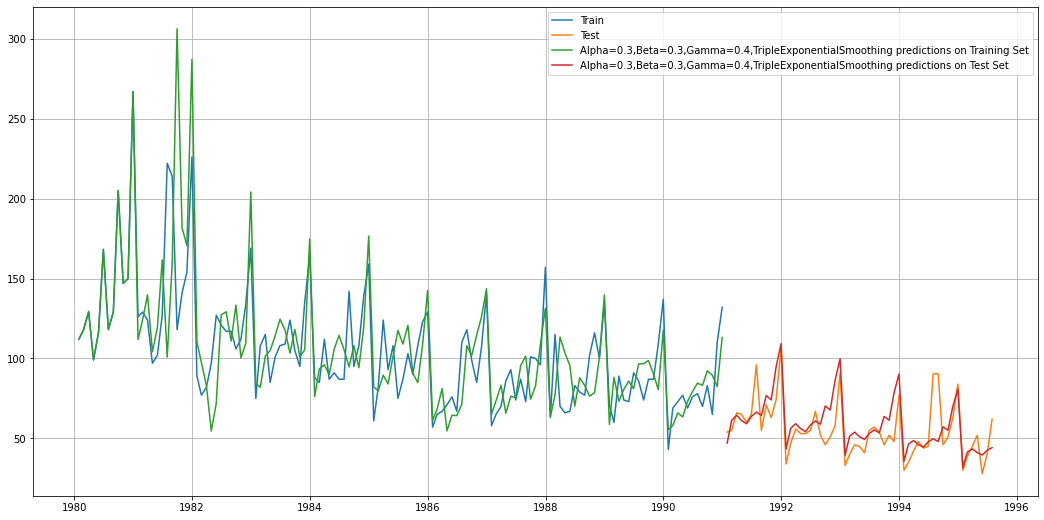

In [242]:

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['predict', 0.3, 0.3, 0.4], label='Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.3, 0.3, 0.4], label='Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

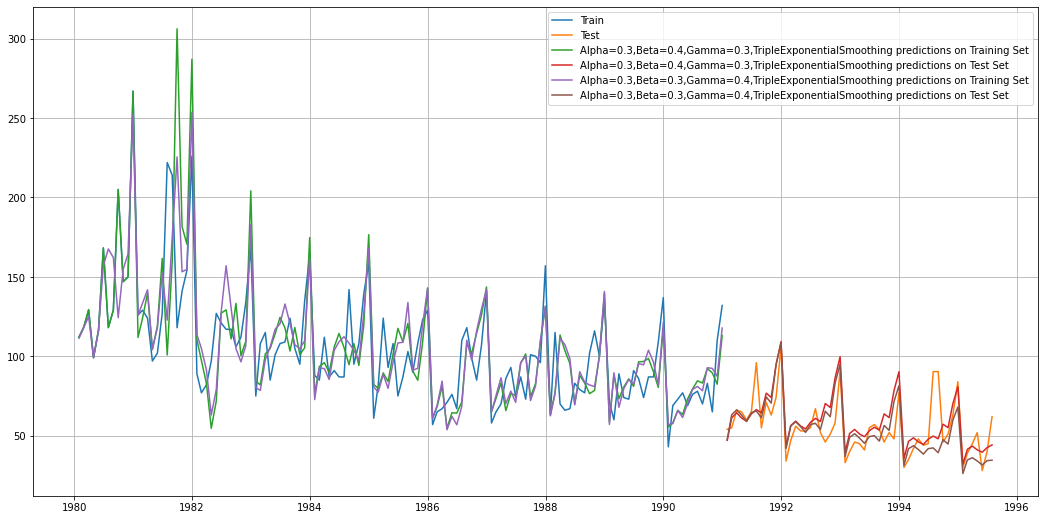

In [246]:

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.plot(TES_train['predict', 0.3, 0.3, 0.4], label='Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.3, 0.3, 0.4], label='Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [244]:
## Training Data

rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Rose'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['Rose'],TES_train['auto_predict'])
print("For Alpha:  0.10609635267729095,Beta: 0.048438465970941876 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1, mape_model6_train_1))

## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['Rose'],TES_test['auto_predict'])
print("For Alpha:0.10609635267729095,Beta: 0.048438465970941876 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test_1, mape_model6_test_1))

For Alpha:  0.10609635267729095,Beta: 0.048438465970941876 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 18.579 MAPE is 13.21
For Alpha:0.10609635267729095,Beta: 0.048438465970941876 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 17.248 MAPE is 27.86


In [245]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][66]],'Test MAPE':[resultsDf_8_2['Test MAPE'][66]]}
                           ,index=['Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     16.979000      24.36
RegressionOnTime                                     16.979000      24.36
NaiveModel                                           78.396083     137.89
SimpleAverageModel                                   52.318735      89.19
2pointTrailingMovingAverage                          12.298291      14.59
4pointTrailingMovingAverage                          15.845558      21.55
6pointTrailingMovingAverage                          15.986163      22.40
9pointTrailingMovingAverage                          16.500823      23.18
Alpha=1,SimpleExponentialSmoothing                   35.936214      59.49
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       263.521730     426.54
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       263.521730     426.54
Alpha=0.106,Beta=0.484,Gamma=0.0,TripleExponent...   68.971917     113.77
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...         NaN        NaN
ARIMA(0,1,2)                                         17.279789        NaN
ARIMA(1,1,1)                                         17.362780        NaN
SARIMA(1, 1, 2)(2, 0, 2, 6)                          25.329218        NaN
SARIMA(1, 1, 1)(2, 0, [1, 2], 6)                     26.428515        NaN
RMSE of the Full Model                               34.861673        NaN
ARIMA(1,1,1)                                         23.381832        NaN
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...         NaN        NaN

In [152]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']),'\n','\n')
print('Sorted by MAPE values on the Test Data:','\n',resultsDf.sort_values(by=['Test MAPE']))

Sorted by RMSE values on the Test Data: 
                                                      Test RMSE  Test MAPE
2pointTrailingMovingAverage                          12.298291      14.59
4pointTrailingMovingAverage                          15.845558      21.55
6pointTrailingMovingAverage                          15.986163      22.40
9pointTrailingMovingAverage                          16.500823      23.18
RegressionOnTime                                     16.979000      24.36
RegressionOnTime                                     16.979000      24.36
Alpha=1,SimpleExponentialSmoothing                   35.936214      59.49
SimpleAverageModel                                   52.318735      89.19
Alpha=0.106,Beta=0.484,Gamma=0.0,TripleExponent...   68.971917     113.77
NaiveModel                                           78.396083     137.89
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       263.521730     426.54
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       263.521730     426

We see that the best model is the Triple Exponential Smoothing with additive seasonality with the parameters  𝛼  = 0.3,  𝛽  = 0.3 and  𝛾  = 0.4

<span style="font-family:Perpetua Titling MT; font-size:1.3em;"><B/><U/>Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

In [153]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [154]:
ARIMA_train = df1[df.index.year < 1991]
ARIMA_test = df1[df.index.year >= 1991]

In [155]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [156]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(ARIMA_train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830465377
ARIMA(0, 1, 2) - AIC:1276.8353734326238
ARIMA(1, 1, 0) - AIC:1319.348310580191
ARIMA(1, 1, 1) - AIC:1277.7757482046586
ARIMA(1, 1, 2) - AIC:1277.3592262606467
ARIMA(2, 1, 0) - AIC:1300.6092611743957
ARIMA(2, 1, 1) - AIC:1279.0456894093306
ARIMA(2, 1, 2) - AIC:1279.2986939365405


In [157]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1276.835373
5  (1, 1, 2)  1277.359226
4  (1, 1, 1)  1277.775748
7  (2, 1, 1)  1279.045689
8  (2, 1, 2)  1279.298694
1  (0, 1, 1)  1280.726183
6  (2, 1, 0)  1300.609261
3  (1, 1, 0)  1319.348311
0  (0, 1, 0)  1335.152658

In [158]:
auto_ARIMA = ARIMA(ARIMA_train['Rose'], order=(0,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sun, 13 Sep 2020   AIC                           1276.835
Time:                        21:17:53   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

In [159]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(ARIMA_test))

In [160]:
from sklearn.metrics import  mean_squared_error
Test_RMSE = mean_squared_error(ARIMA_test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(Test_RMSE)

17.279788902386073


In [161]:

resultsDf_9 = pd.DataFrame({'Test RMSE': [Test_RMSE]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     16.979000      24.36
RegressionOnTime                                     16.979000      24.36
NaiveModel                                           78.396083     137.89
SimpleAverageModel                                   52.318735      89.19
2pointTrailingMovingAverage                          12.298291      14.59
4pointTrailingMovingAverage                          15.845558      21.55
6pointTrailingMovingAverage                          15.986163      22.40
9pointTrailingMovingAverage                          16.500823      23.18
Alpha=1,SimpleExponentialSmoothing                   35.936214      59.49
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       263.521730     426.54
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       263.521730     426.54
Alpha=0.106,Beta=0.484,Gamma=0.0,TripleExponent...   68.971917     113.77
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...         NaN        NaN
ARIMA(0,1,2)                                         17.279789        NaN

In [162]:
final_hat_avg =ARIMA_test.copy()
pred_ARIMA = results_auto_ARIMA.forecast(steps=len(ARIMA_test))
pred_ARIMA[0]

array([83.95263904, 71.47903535, 70.99049472, 70.5019541 , 70.01341347,
       69.52487285, 69.03633222, 68.5477916 , 68.05925097, 67.57071035,
       67.08216972, 66.5936291 , 66.10508847, 65.61654785, 65.12800722,
       64.6394666 , 64.15092597, 63.66238535, 63.17384472, 62.6853041 ,
       62.19676347, 61.70822285, 61.21968222, 60.7311416 , 60.24260097,
       59.75406035, 59.26551972, 58.7769791 , 58.28843847, 57.79989785,
       57.31135722, 56.8228166 , 56.33427597, 55.84573535, 55.35719472,
       54.8686541 , 54.38011347, 53.89157285, 53.40303222, 52.9144916 ,
       52.42595097, 51.93741035, 51.44886972, 50.9603291 , 50.47178847,
       49.98324785, 49.49470722, 49.0061666 , 48.51762597, 48.02908535,
       47.54054472, 47.0520041 , 46.56346347, 46.07492285, 45.58638222])

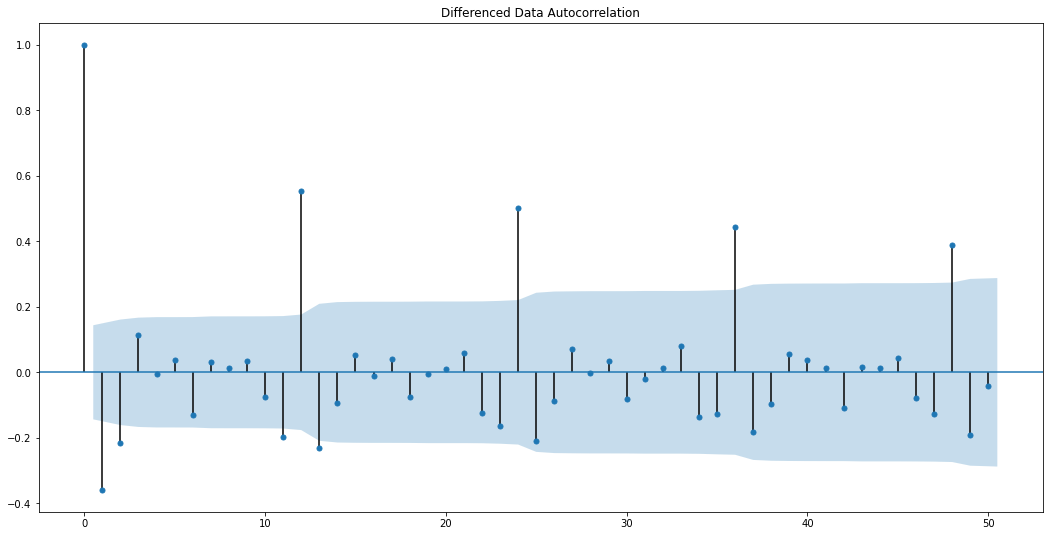

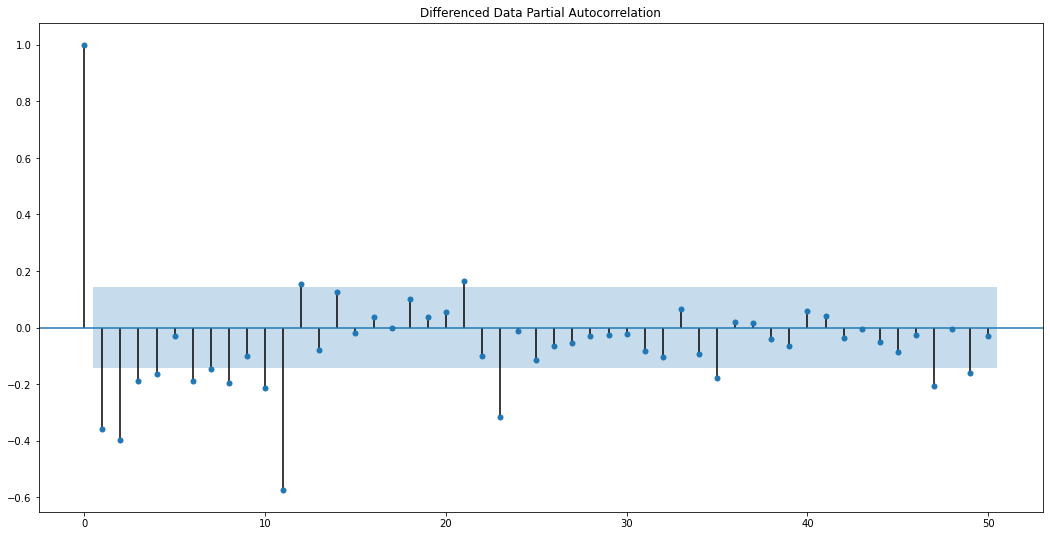

In [163]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [204]:
manual_ARIMA = ARIMA(ARIMA_test['Rose'], order=(1,1,1),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                   54
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -229.931
Method:                       css-mle   S.D. of innovations             16.503
Date:                Sun, 13 Sep 2020   AIC                            467.861
Time:                        21:35:00   BIC                            475.817
Sample:                    02-28-1991   HQIC                           470.930
                         - 07-31-1995                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2979      0.153     -1.943      0.052      -0.598       0.003
ar.L1.D.Rose     0.0893      0.138      0.649      0.516      -0.180       0.359
ma.L1.D.Rose    -1.0000      0.058    -17.34

In [205]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(ARIMA_test))

In [206]:
ARIMA_RMSE1 = mean_squared_error(ARIMA_test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(ARIMA_RMSE1)

23.38183193452227


In [207]:

resultsDf_10 = pd.DataFrame({'Test RMSE': [ARIMA_RMSE1]}
                           ,index=['ARIMA(1,1,1)'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     16.979000      24.36
RegressionOnTime                                     16.979000      24.36
NaiveModel                                           78.396083     137.89
SimpleAverageModel                                   52.318735      89.19
2pointTrailingMovingAverage                          12.298291      14.59
4pointTrailingMovingAverage                          15.845558      21.55
6pointTrailingMovingAverage                          15.986163      22.40
9pointTrailingMovingAverage                          16.500823      23.18
Alpha=1,SimpleExponentialSmoothing                   35.936214      59.49
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       263.521730     426.54
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       263.521730     426.54
Alpha=0.106,Beta=0.484,Gamma=0.0,TripleExponent...   68.971917     113.77
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...         NaN        NaN
ARIMA(0,1,2)                                         17.279789        NaN
ARIMA(1,1,1)                                         17.362780        NaN
SARIMA(1, 1, 2)(2, 0, 2, 6)                          25.329218        NaN
SARIMA(1, 1, 1)(2, 0, [1, 2], 6)                     26.428515        NaN
RMSE of the Full Model                               34.861673        NaN
ARIMA(1,1,1)                                         23.381832        NaN

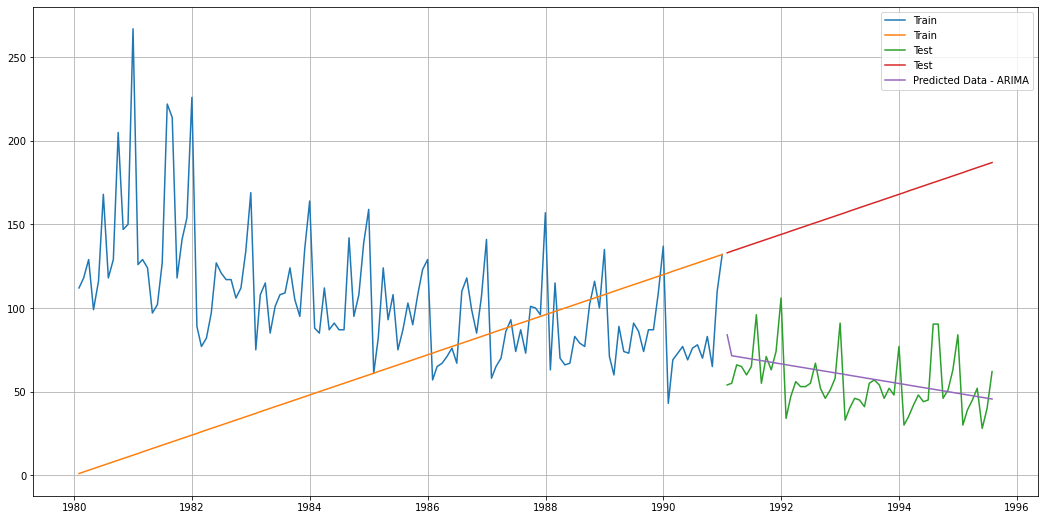

In [168]:
plt.plot(ARIMA_train,label='Train')
plt.plot(ARIMA_test,label='Test')
plt.plot(ARIMA_test.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

<span style="font-family:Perpetua Titling MT; font-size:1.3em;"><B/><U/>Build an SARIMA model

In [169]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [170]:
SARIMA_train = df1[df.index.year < 1991]
SARIMA_test = df1[df.index.year >= 1991]

In [172]:
SARIMA_train_final = train[['Rose']]
SARIMA_test_final=test[['Rose']]

In [173]:
print(SARIMA_train_final.shape)
print(SARIMA_test_final.shape)

(132, 1)
(55, 1)


In [174]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [175]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(SARIMA_train_final['Rose'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        
        SARIMA_AIC= SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1145.4230827207243
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:976.4375296380897
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1116.0207869685782
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:969.6913640042145
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:962.8794541633742
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:955.5735409343353
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:1263.536909726376
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1098.5554825916988
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:923.6314049709545
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1095.7936324695206
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1054.7434331284003
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:918.8573482601487
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:914.5982866198062
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:915.3332430440257
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:901.2034260948161
SARI

In [176]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
80  (2, 1, 2)  (2, 0, 2, 12)  890.668848
53  (1, 1, 2)  (2, 0, 2, 12)  896.463087
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
78  (2, 1, 2)  (2, 0, 0, 12)  897.346498

In [177]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Sun, 13 Sep 2020   AIC                           1041.656
Time:                                   21:24:06   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5939      0.152     -3.913      0.000      -0.891      -0.296
ma.L1         -0.1954    501.771     -0.000

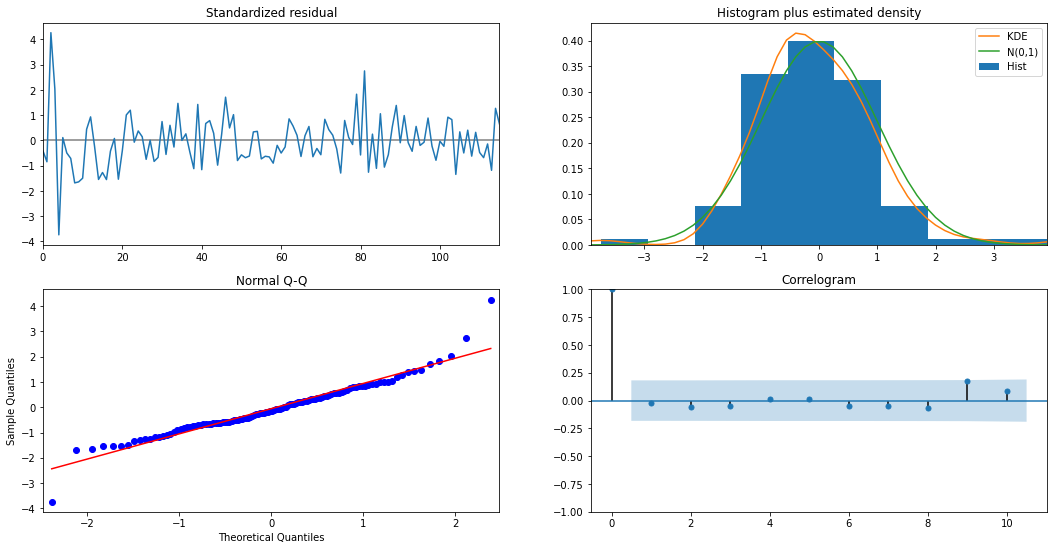

In [178]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [179]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(SARIMA_test))

In [180]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.840442  18.848071      25.898902      99.781982
1  67.629921  19.300031      29.802555     105.457288
2  74.746267  19.412602      36.698266     112.794268
3  71.324912  19.475544      33.153548     109.496276
4  76.017616  19.483819      37.830032     114.205200

In [181]:
from math import sqrt
from sklearn.metrics import mean_squared_error
SARIMA_RMSE = sqrt(mean_squared_error(SARIMA_test_final.Rose,predicted_auto_SARIMA_6.predicted_mean))
print(SARIMA_RMSE)

25.32921789584606


In [182]:
resultsDf_11 = pd.DataFrame({'Test RMSE': SARIMA_RMSE}
                           ,index=['SARIMA(1, 1, 2)(2, 0, 2, 6)'])

resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     16.979000      24.36
RegressionOnTime                                     16.979000      24.36
NaiveModel                                           78.396083     137.89
SimpleAverageModel                                   52.318735      89.19
2pointTrailingMovingAverage                          12.298291      14.59
4pointTrailingMovingAverage                          15.845558      21.55
6pointTrailingMovingAverage                          15.986163      22.40
9pointTrailingMovingAverage                          16.500823      23.18
Alpha=1,SimpleExponentialSmoothing                   35.936214      59.49
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       263.521730     426.54
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       263.521730     426.54
Alpha=0.106,Beta=0.484,Gamma=0.0,TripleExponent...   68.971917     113.77
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...         NaN        NaN
ARIMA(0,1,2)                                         17.279789        NaN
ARIMA(1,1,1)                                         17.362780        NaN
SARIMA(1, 1, 2)(2, 0, 2, 6)                          25.329218        NaN

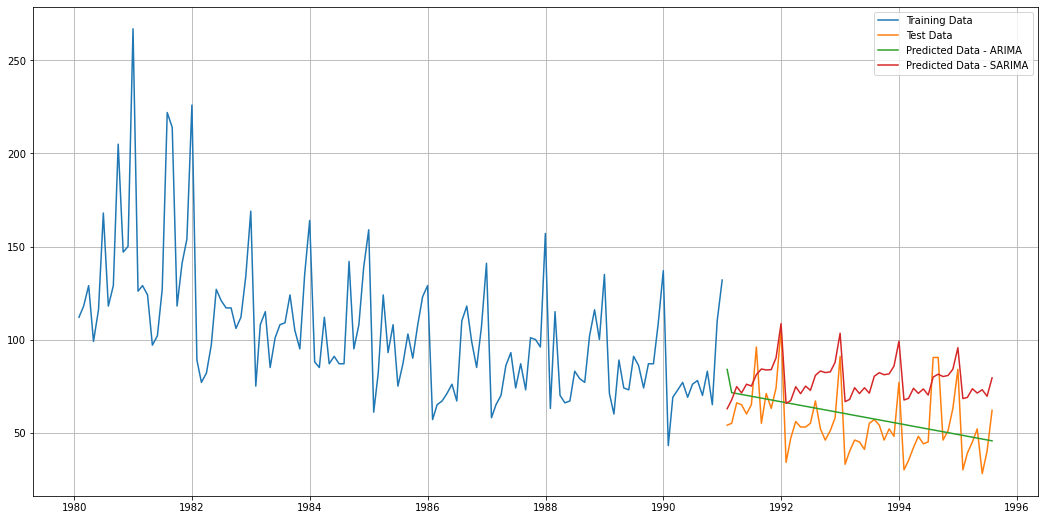

In [183]:
plt.plot(SARIMA_train_final,label='Training Data')
plt.plot(SARIMA_test_final,label='Test Data')
plt.plot(SARIMA_test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(SARIMA_test_final.index,predicted_auto_SARIMA_6.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

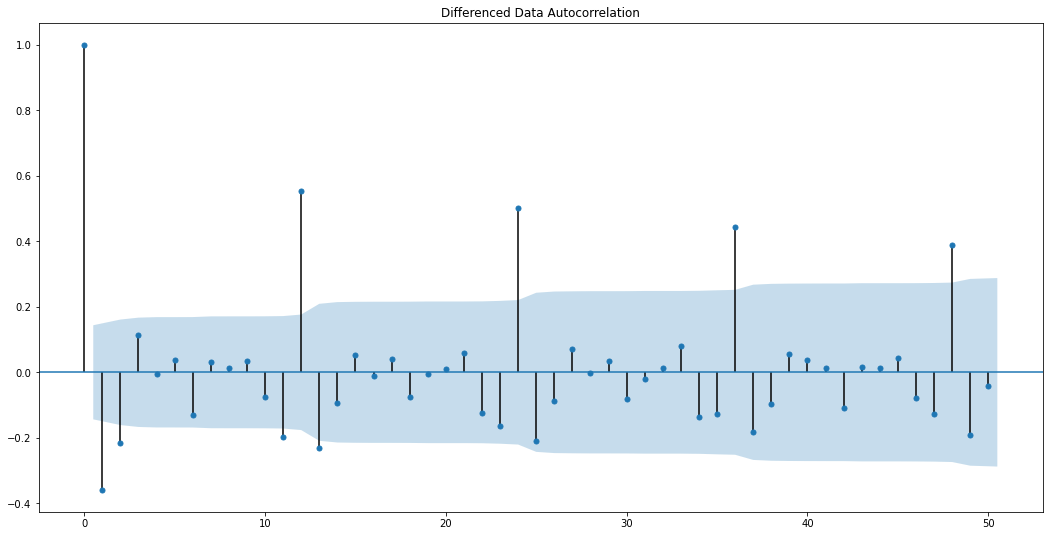

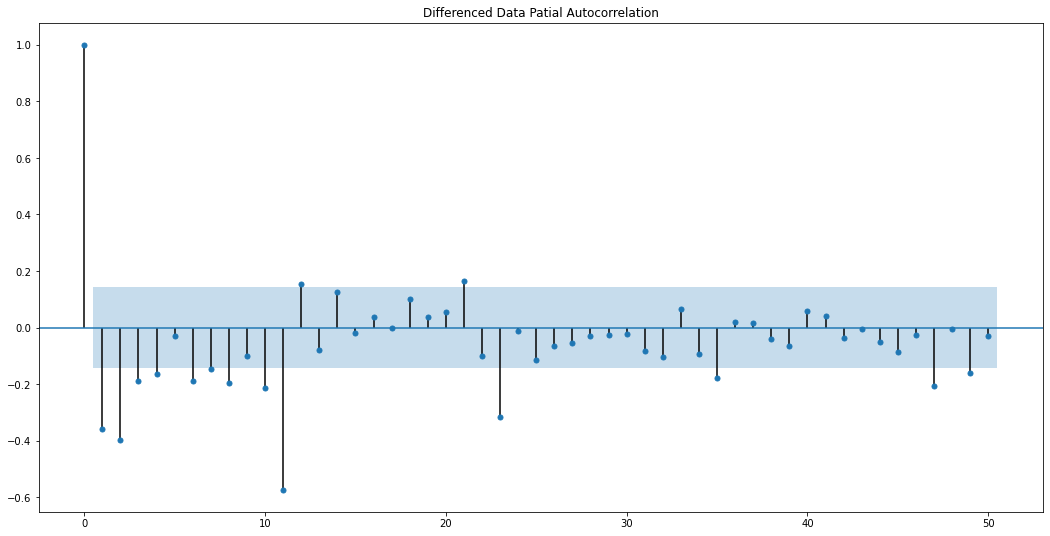

In [184]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

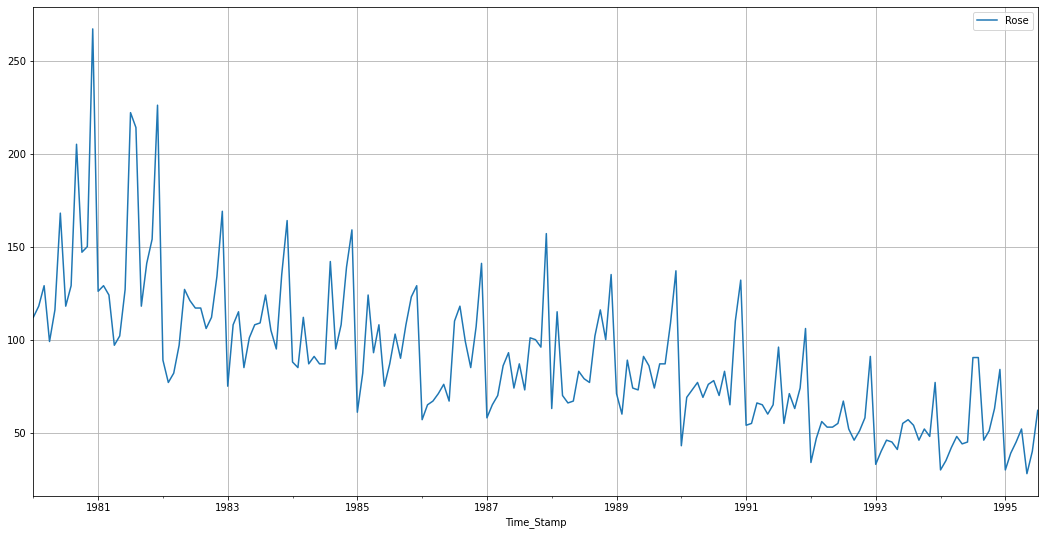

In [185]:
df.plot()
plt.grid()

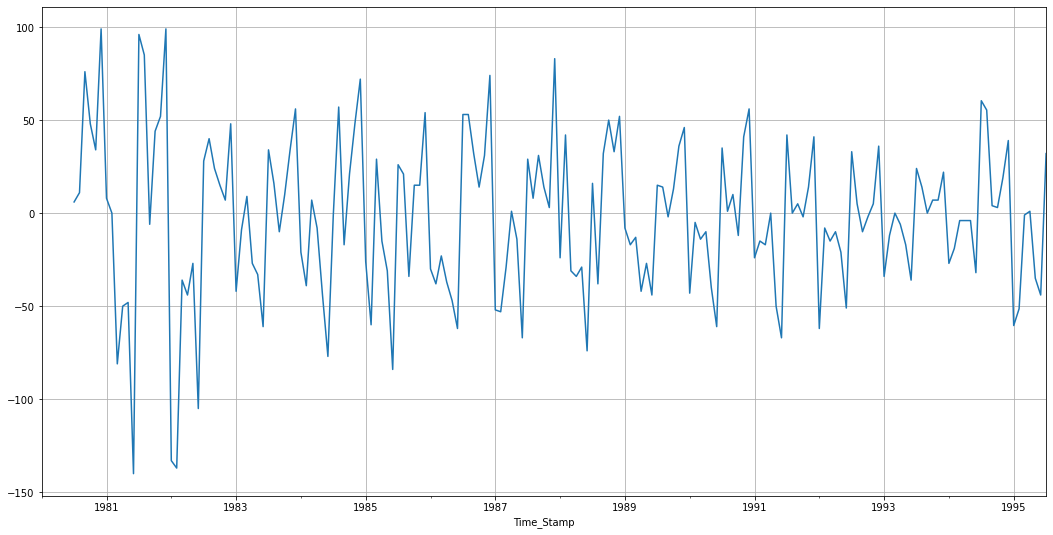

In [186]:
(df['Rose'].diff(6)).plot()
plt.grid();

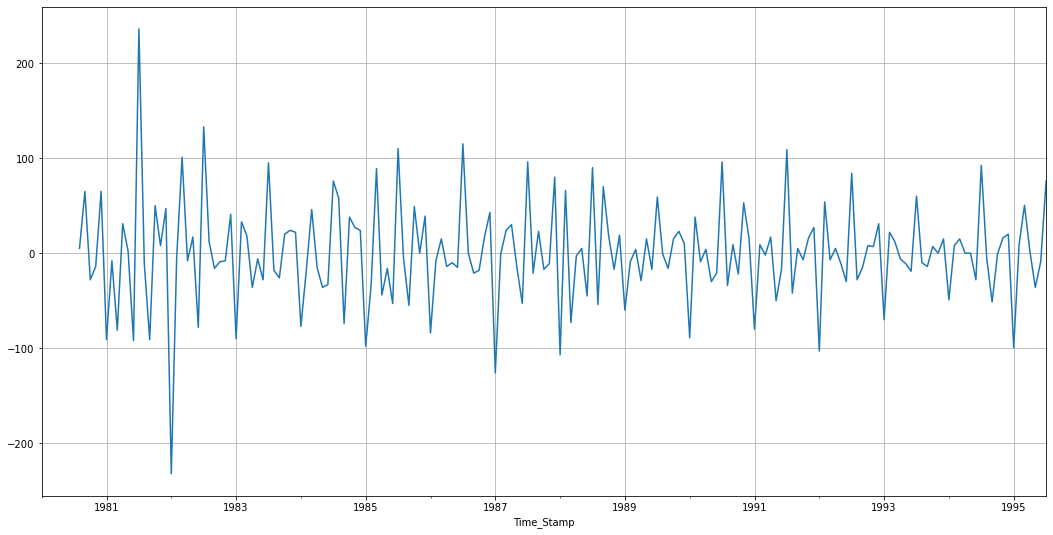

In [187]:
(df['Rose'].diff(6)).diff().plot()
plt.grid();

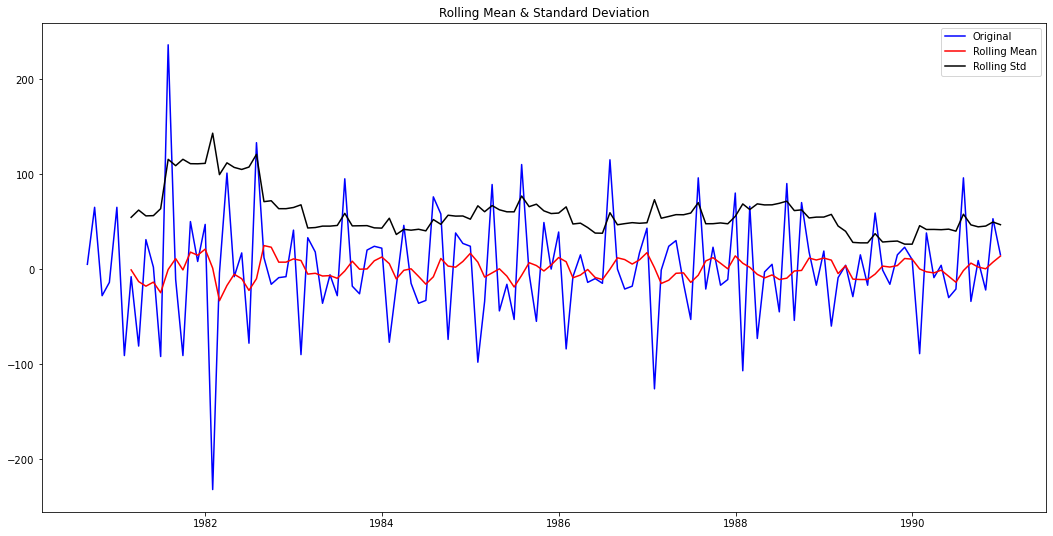

Results of Dickey-Fuller Test:
Test Statistic                -6.882869e+00
p-value                        1.418693e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [188]:
test_stationarity((SARIMA_train['Rose'].diff(6).dropna()).diff(1).dropna())

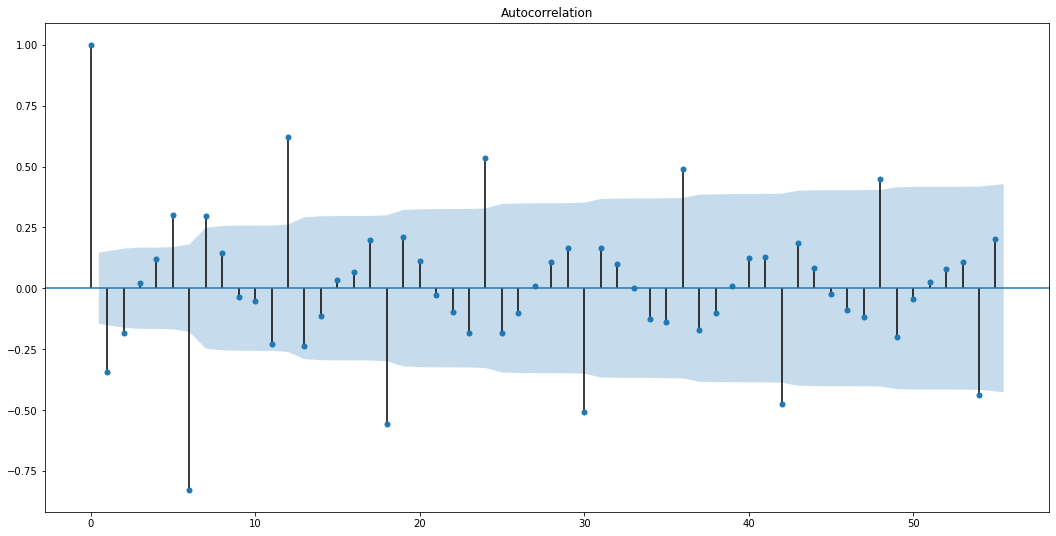

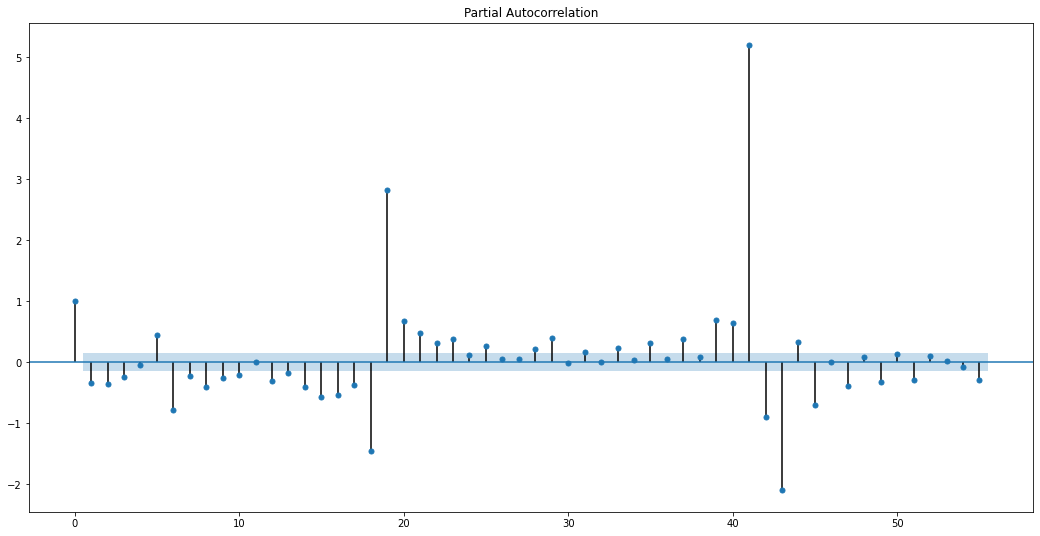

In [189]:
plot_acf((df['Rose'].diff(6).dropna()).diff(1).dropna(),lags=55)
plot_pacf((df['Rose'].diff(6).dropna()).diff(1).dropna(),lags=55);

In [190]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                order=(1, 1, 1),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2], 6)   Log Likelihood                -519.389
Date:                                Sun, 13 Sep 2020   AIC                           1052.778
Time:                                        21:24:19   BIC                           1072.114
Sample:                                             0   HQIC                          1060.628
                                                - 132                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1388      0.074      1.870      0.062      -0.007       0.284
ma.

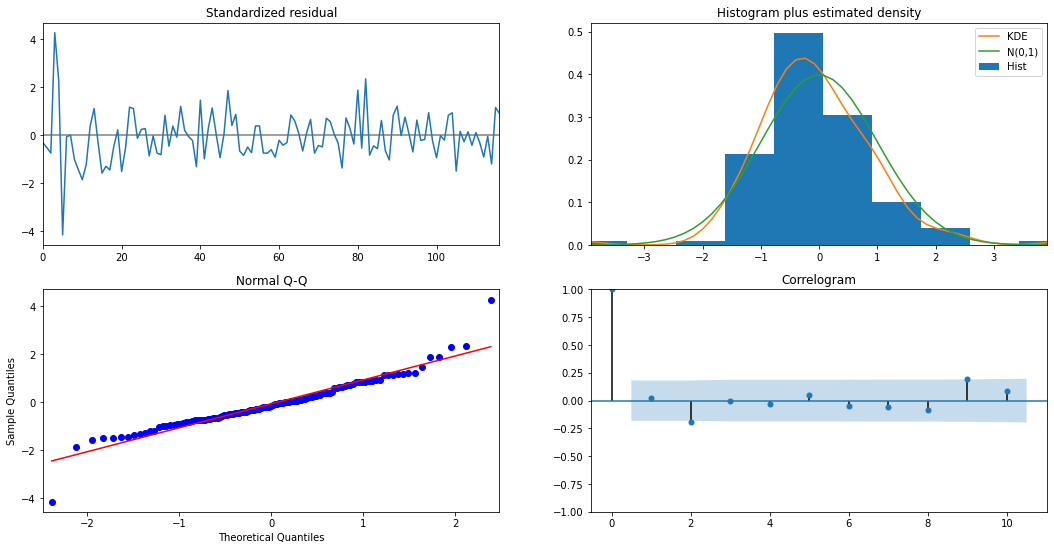

In [191]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [192]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(SARIMA_test))

In [193]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  68.810993  19.212662      31.154868     106.467118
1  67.919472  19.416539      29.863754     105.975190
2  76.218541  19.426179      38.143929     114.293153
3  71.829684  19.427161      33.753149     109.906219
4  76.745173  19.427290      38.668384     114.821961

In [194]:
SARIMA_RMSE1 = mean_squared_error(SARIMA_test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(SARIMA_RMSE)

25.32921789584606


In [195]:
resultsDf_12 = pd.DataFrame({'Test RMSE': SARIMA_RMSE1}
                           ,index=['SARIMA(1, 1, 1)(2, 0, [1, 2], 6)'])

resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     16.979000      24.36
RegressionOnTime                                     16.979000      24.36
NaiveModel                                           78.396083     137.89
SimpleAverageModel                                   52.318735      89.19
2pointTrailingMovingAverage                          12.298291      14.59
4pointTrailingMovingAverage                          15.845558      21.55
6pointTrailingMovingAverage                          15.986163      22.40
9pointTrailingMovingAverage                          16.500823      23.18
Alpha=1,SimpleExponentialSmoothing                   35.936214      59.49
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       263.521730     426.54
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       263.521730     426.54
Alpha=0.106,Beta=0.484,Gamma=0.0,TripleExponent...   68.971917     113.77
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...         NaN        NaN
ARIMA(0,1,2)                                         17.279789        NaN
ARIMA(1,1,1)                                         17.362780        NaN
SARIMA(1, 1, 2)(2, 0, 2, 6)                          25.329218        NaN
SARIMA(1, 1, 1)(2, 0, [1, 2], 6)                     26.428515        NaN

<B>Building the most optimum model on the Full Data

In [196]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -740.516
Date:                           Sun, 13 Sep 2020   AIC                           1497.032
Time:                                   21:24:32   BIC                           1522.165
Sample:                               01-31-1980   HQIC                          1507.230
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7663      0.079      9.754      0.000       0.612       0.920
ma.L1         -1.6771      0.110    -15.226

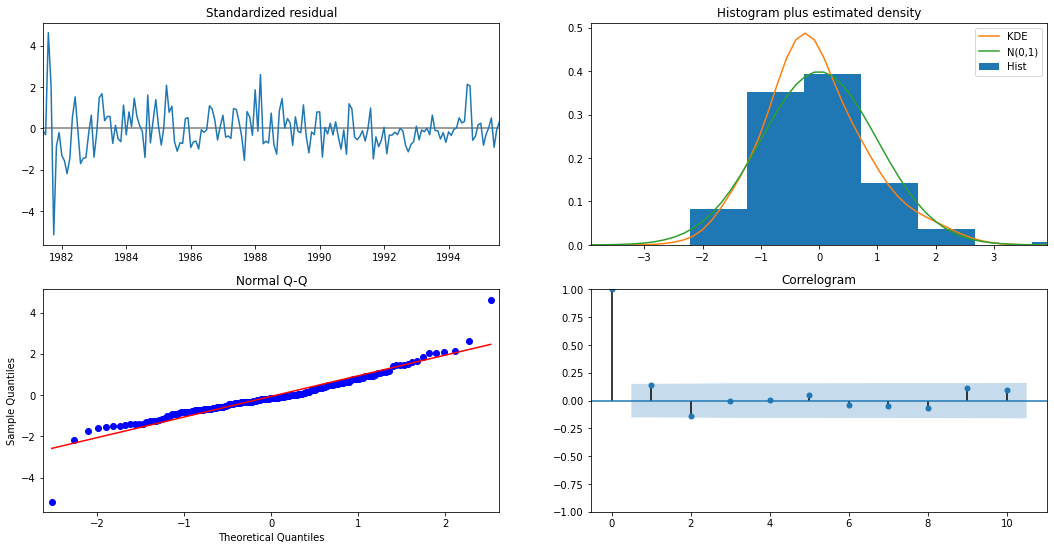

In [197]:
results_full_data_model.plot_diagnostics();

Evaluate the model on the whole and predict 12 months into the future with appropriate confidence intervals/bands.

In [198]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [199]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  56.084192  17.482090      21.819925      90.348460
1995-09-30  50.876800  17.549859      16.479707      85.273892
1995-10-31  54.485267  17.618044      19.954536      89.015998
1995-11-30  55.176438  17.686350      20.511829      89.841047
1995-12-31  73.717891  17.754616      38.919483     108.516299

In [200]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-07-31',end='1996-06-30', freq='M'))

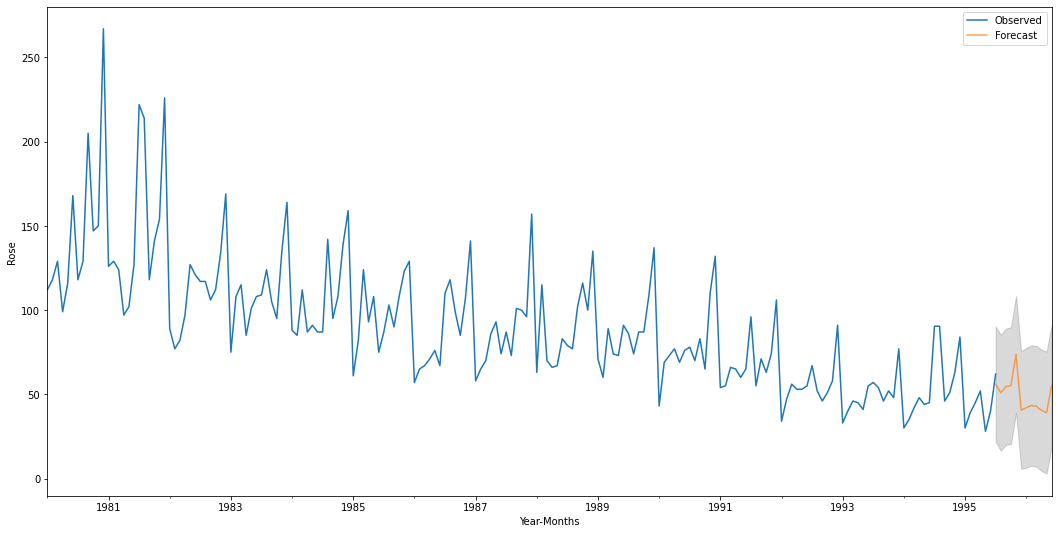

In [201]:
axis = df['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

In [202]:
RMSE_Full_Model = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',RMSE_Full_Model)

RMSE of the Full Model 34.86167297234669


In [203]:
resultsDf_13 = pd.DataFrame({'Test RMSE': RMSE_Full_Model}
                           ,index=['RMSE of the Full Model'])

resultsDf = pd.concat([resultsDf, resultsDf_13])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     16.979000      24.36
RegressionOnTime                                     16.979000      24.36
NaiveModel                                           78.396083     137.89
SimpleAverageModel                                   52.318735      89.19
2pointTrailingMovingAverage                          12.298291      14.59
4pointTrailingMovingAverage                          15.845558      21.55
6pointTrailingMovingAverage                          15.986163      22.40
9pointTrailingMovingAverage                          16.500823      23.18
Alpha=1,SimpleExponentialSmoothing                   35.936214      59.49
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       263.521730     426.54
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       263.521730     426.54
Alpha=0.106,Beta=0.484,Gamma=0.0,TripleExponent...   68.971917     113.77
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...         NaN        NaN
ARIMA(0,1,2)                                         17.279789        NaN
ARIMA(1,1,1)                                         17.362780        NaN
SARIMA(1, 1, 2)(2, 0, 2, 6)                          25.329218        NaN
SARIMA(1, 1, 1)(2, 0, [1, 2], 6)                     26.428515        NaN
RMSE of the Full Model                               34.861673        NaN

In [209]:
resultsDf.sort_values(by='Test RMSE',ascending=True)

Test RMSE  Test MAPE
2pointTrailingMovingAverage                          12.298291      14.59
4pointTrailingMovingAverage                          15.845558      21.55
6pointTrailingMovingAverage                          15.986163      22.40
9pointTrailingMovingAverage                          16.500823      23.18
RegressionOnTime                                     16.979000      24.36
RegressionOnTime                                     16.979000      24.36
ARIMA(0,1,2)                                         17.279789        NaN
ARIMA(1,1,1)                                         17.362780        NaN
ARIMA(1,1,1)                                         23.381832        NaN
SARIMA(1, 1, 2)(2, 0, 2, 6)                          25.329218        NaN
SARIMA(1, 1, 1)(2, 0, [1, 2], 6)                     26.428515        NaN
RMSE of the Full Model                               34.861673        NaN
Alpha=1,SimpleExponentialSmoothing                   35.936214      59.49
SimpleAverageModel                                   52.318735      89.19
Alpha=0.106,Beta=0.484,Gamma=0.0,TripleExponent...   68.971917     113.77
NaiveModel                                           78.396083     137.89
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       263.521730     426.54
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       263.521730     426.54
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...         NaN        NaN

ARIMA Optimum Model

In [223]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(0, 1, 2),
                                seasonal_order=None,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  187
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -870.789
Date:                Sun, 13 Sep 2020   AIC                           1747.578
Time:                        22:30:00   BIC                           1757.206
Sample:                    01-31-1980   HQIC                          1751.481
                         - 07-31-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7070      0.059    -12.027      0.000      -0.822      -0.592
ma.L2         -0.1809      0.057     -3.156      0.002      -0.293      -0.069
sigma2       791.1162     61.663     12.830      0.0

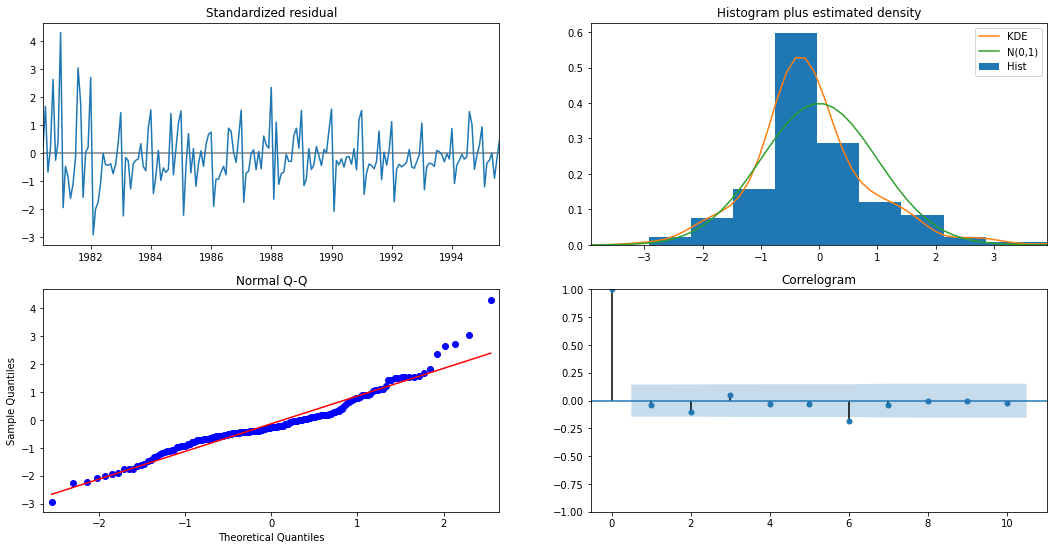

In [212]:
results_full_data_model.plot_diagnostics();

In [213]:
predicted_manual_ARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [214]:
predicted_manual_ARIMA_6_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  53.712605  28.126788      -1.414887     108.840096
1995-09-30  51.318469  29.309038      -6.126190     108.763129
1995-10-31  51.318469  29.478075      -6.457497     109.094436
1995-11-30  51.318469  29.646149      -6.786915     109.423853
1995-12-31  51.318469  29.813275      -7.114475     109.751414

In [219]:
pred_full_manual_ARIMA_date = predicted_manual_ARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-07-31',end='1996-06-30', freq='M'))

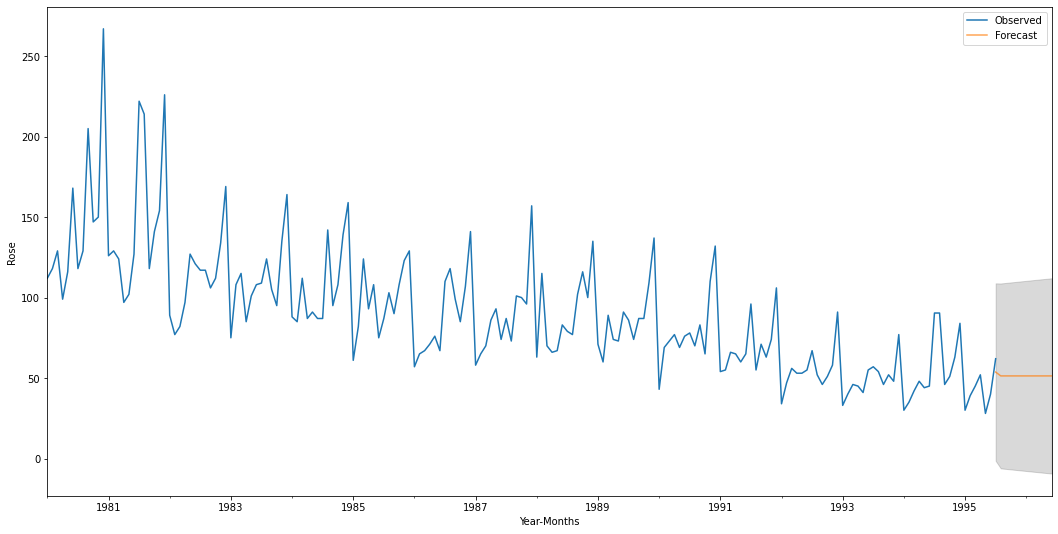

In [220]:
axis = df['Rose'].plot(label='Observed')
pred_full_manual_ARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_ARIMA_date.index, pred_full_manual_ARIMA_date['mean_ci_lower'], 
                  pred_full_manual_ARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

In [221]:
RMSE_Full_Model = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',RMSE_Full_Model)

RMSE of the Full Model 29.253126757550906
